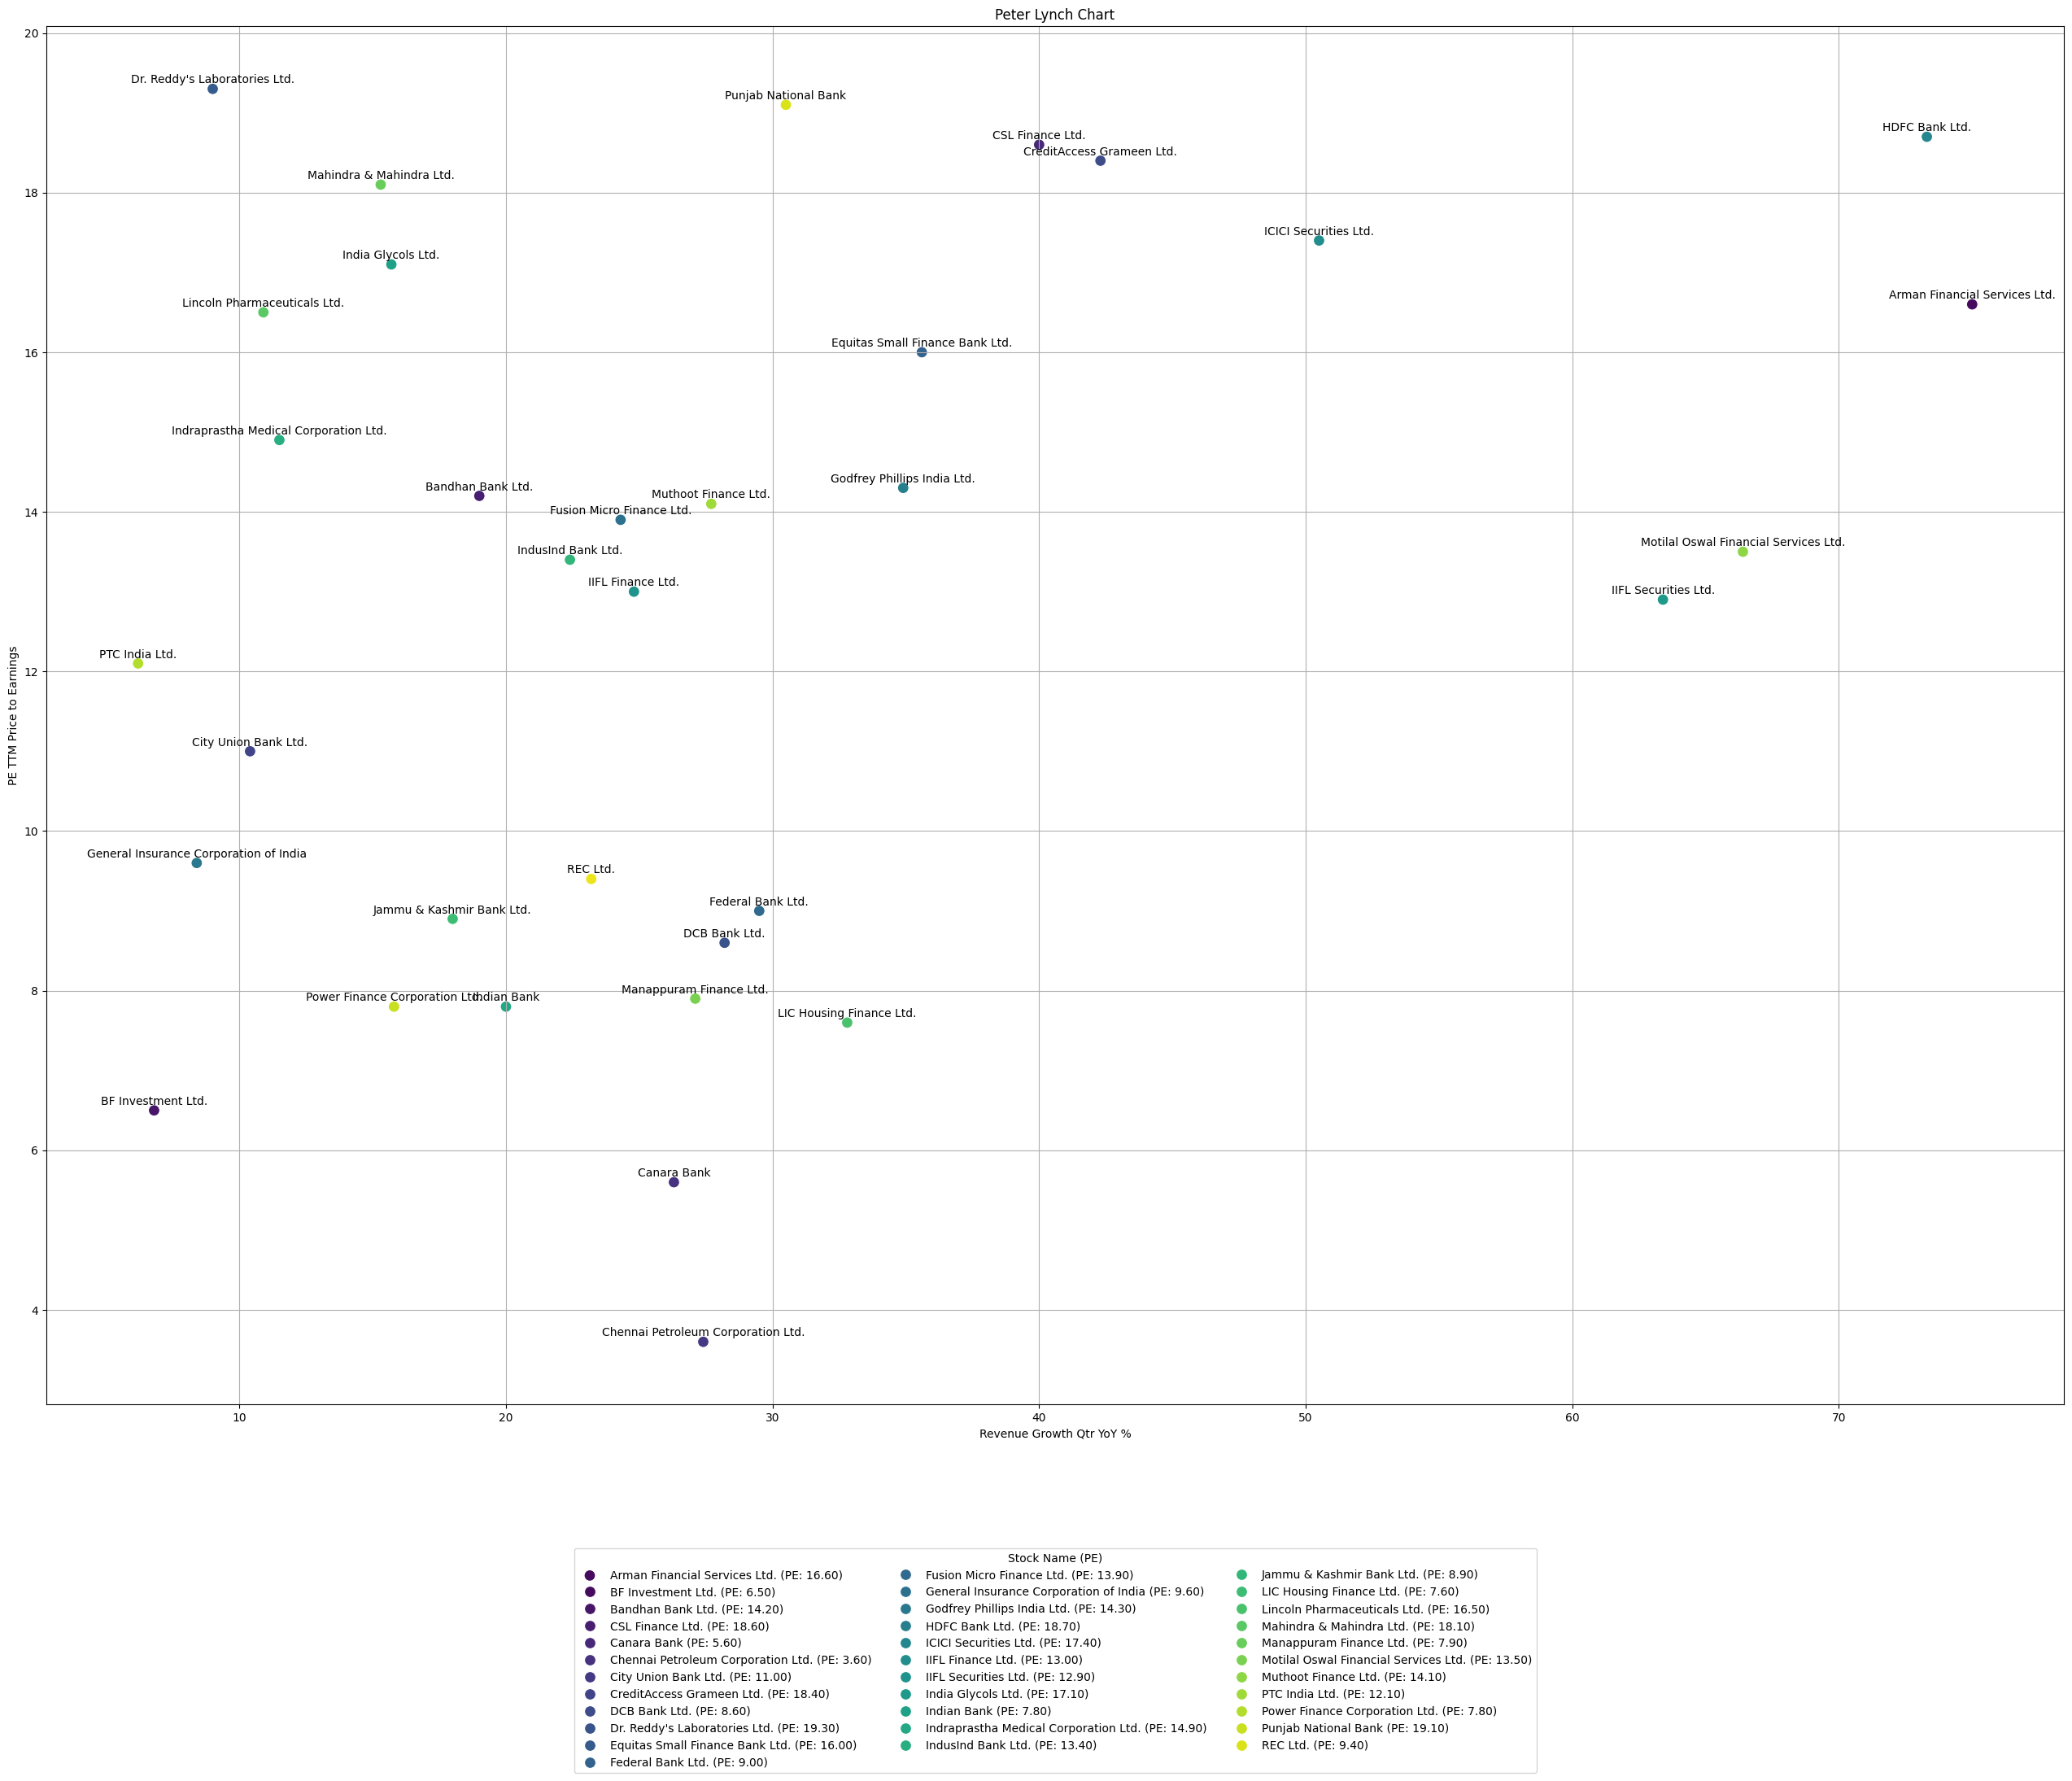

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the file path for CSV
excel_file_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data downloader\StockOverview_QtrResults_Scores_Growth\24012024\NSE\2024-01-24-multigroup.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Filter data where PE is above 0
df_filtered = df[ 

                    
                (df['Market Capitalization in Cr'] > 250)&
                
                # (df['Long Term Debt To Equity Annual'] < 1) &

                # (df['FII holding current Qtr %'] > 0)&
                (df['FII holding change QoQ %'] > 0)&

                # ((df['PE TTM Price to Earnings'] * df['EPS Annual Rs']) > (2*df['Current Price Rs']) )& - misunderstood dont use

                # (df['Price to Book Value']< 2 ) &
                # (df['Price to Book Value'] < df['Industry Price to Book TTM']) &
                (df['PE TTM Price to Earnings'] > 0) & 
                (df['PE TTM Price to Earnings'] <20) & 
                # (df['EPS Qtr YoY Growth %'] < 1 )&
                # (df['PEG TTM PE to Growth'] <5 ) &

                # (df['Promoter holding pledge percentage % Qtr']< 1 ) & 
    
                
                # (df['Revenue QoQ Growth %'] > 0) &
                (df['Revenue Growth Qtr YoY %'] > 0) & 
                (df['Revenue Growth Qtr YoY %'] < 200) &
                (df['Total Revenue Qtr cr'] > df['Total Revenue 1Qtr ago Cr']  )&
                (df['Total Revenue 1Qtr ago Cr'] > df['Total Revenue 2Qtr Cr'])
                # (df['Total Revenue 2Qtr Cr'] > df['Total Revenue 3Qtr Cr'])


                # (df['Net Cash Flow YoY Growth %'] < 1 )&

                # (df['Stock In PE Buy Zone'] < 1 )&
                # (df['Stock In PBV Buy Zone'] < 1 )&
                # (df['%Days traded below current PE Price to Earnings'] < 1 )&
                # (df['%Days traded below current Price to Book Value'] < 1 )&
                
                # (df['RSI'].notna() < 50 ) &
                # (df['% Distance from 52week high'] > 1) 

                ]

# Peter Lynch chart
plt.figure(figsize=(32, 22))

# Scatter plot with swapped x and y-axis
scatter = sns.scatterplot(x='Revenue Growth Qtr YoY %', y='PE TTM Price to Earnings', data=df_filtered, hue='Stock Name', palette='viridis', s=100)

# Annotations
for i in range(len(df_filtered)):
    plt.annotate(df_filtered['Stock Name'].iloc[i], (df_filtered['Revenue Growth Qtr YoY %'].iloc[i], df_filtered['PE TTM Price to Earnings'].iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Peter Lynch Chart')
plt.xlabel('Revenue Growth Qtr YoY %')
plt.ylabel('PE TTM Price to Earnings')
plt.grid(True)

# Modify legend labels to include stock name and PE
legend_labels = [f"{name} (PE: {pe:.2f})" for name, pe in zip(df_filtered['Stock Name'], df_filtered['PE TTM Price to Earnings'])]
scatter.legend(title='Stock Name (PE)', labels=legend_labels, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)  # Adjust bbox_to_anchor and ncol as needed

plt.show()



Sheet Name: Bulk Block Deals


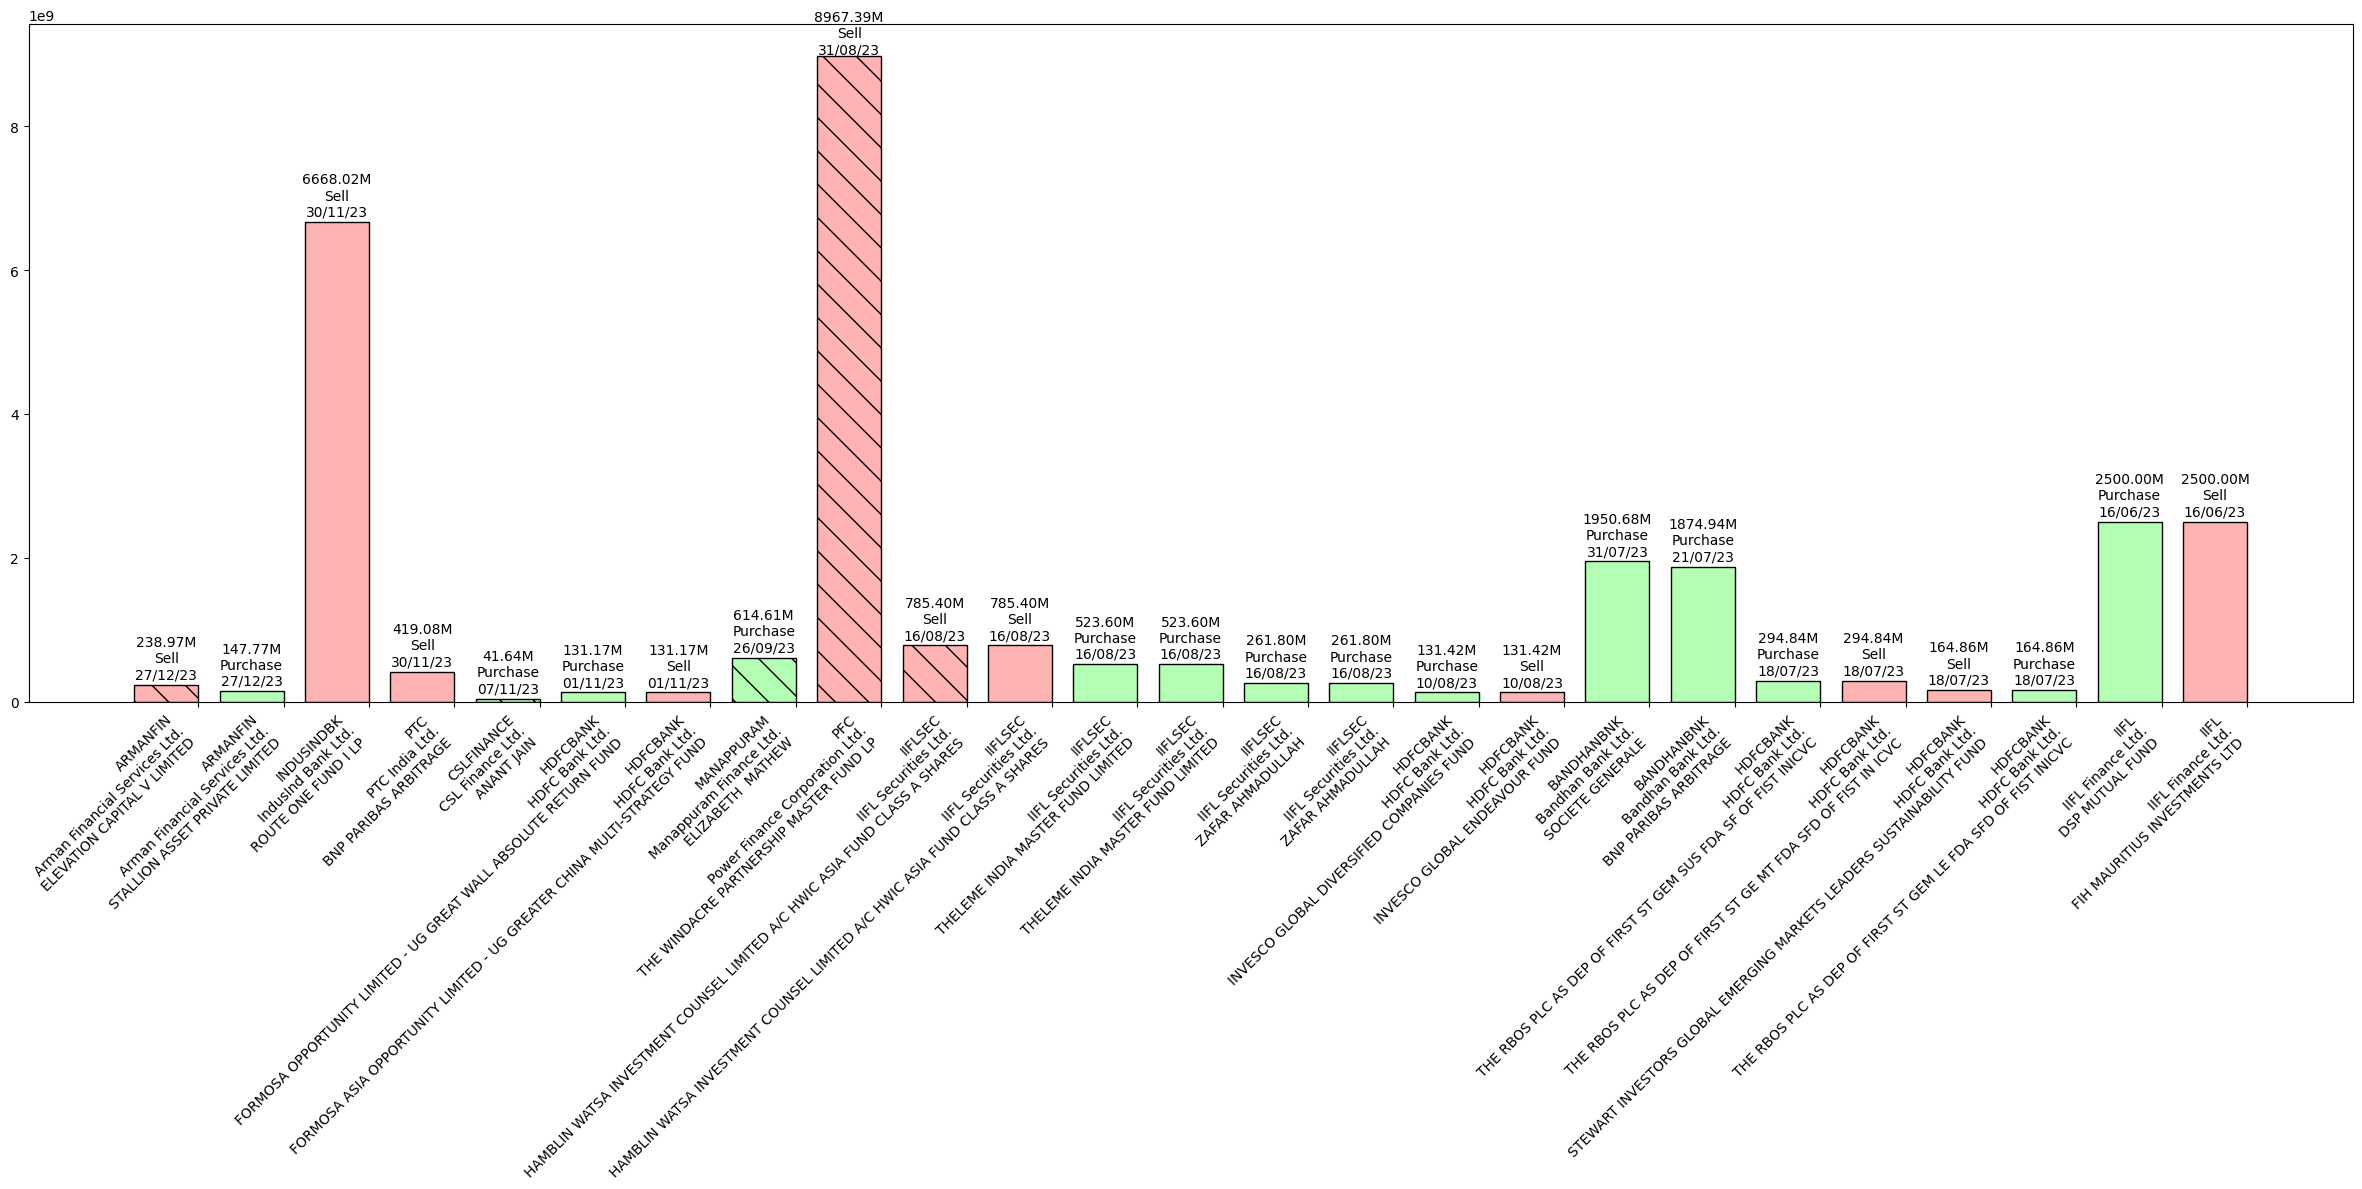

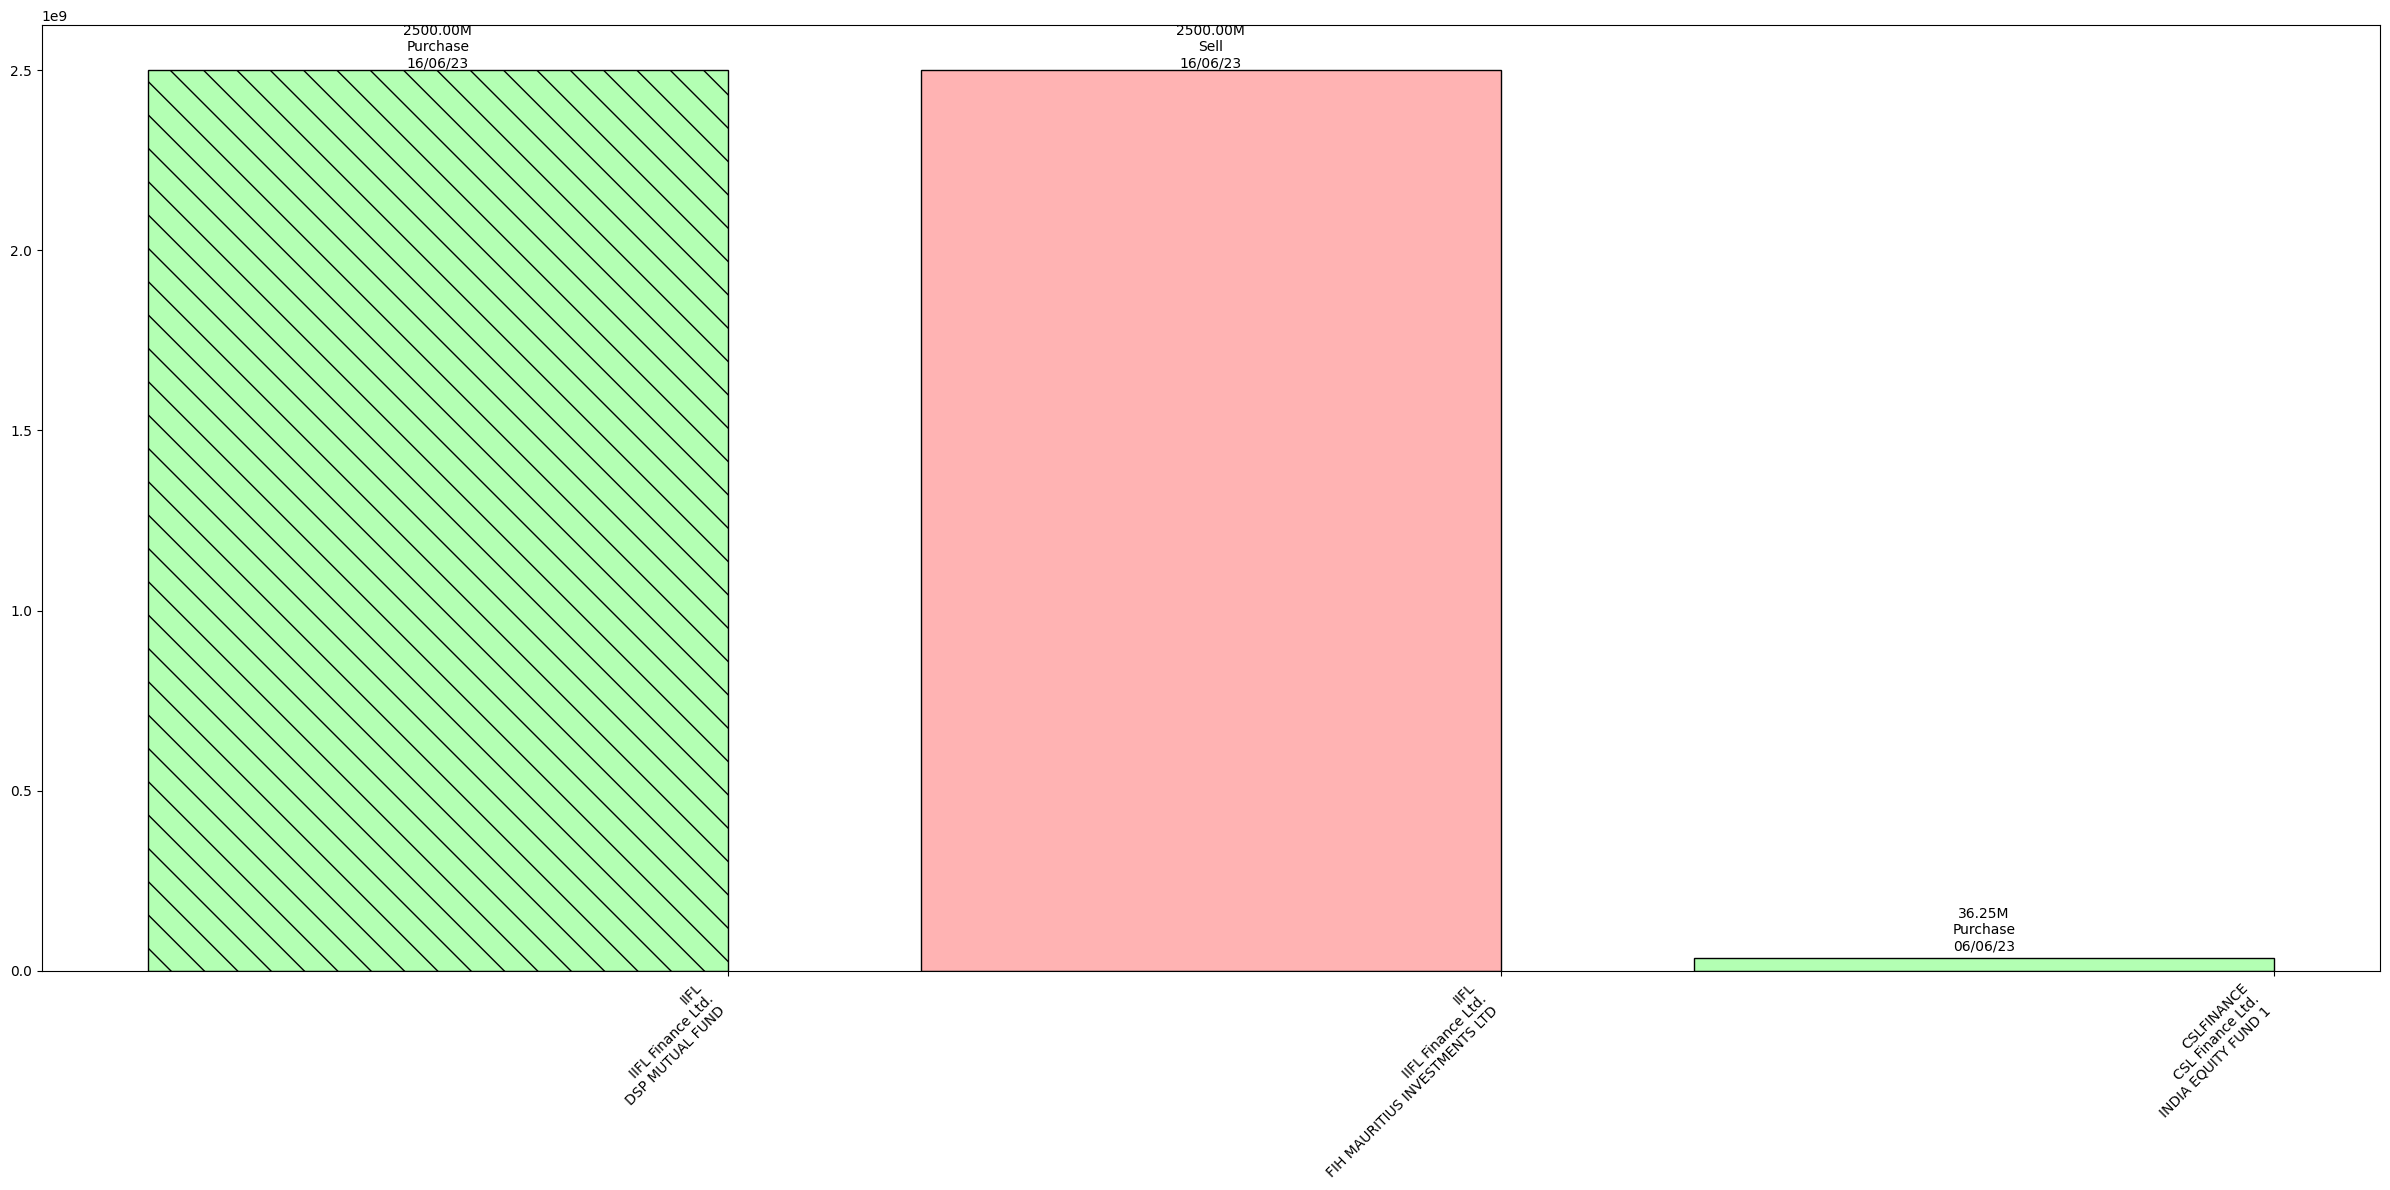


Special Clients:


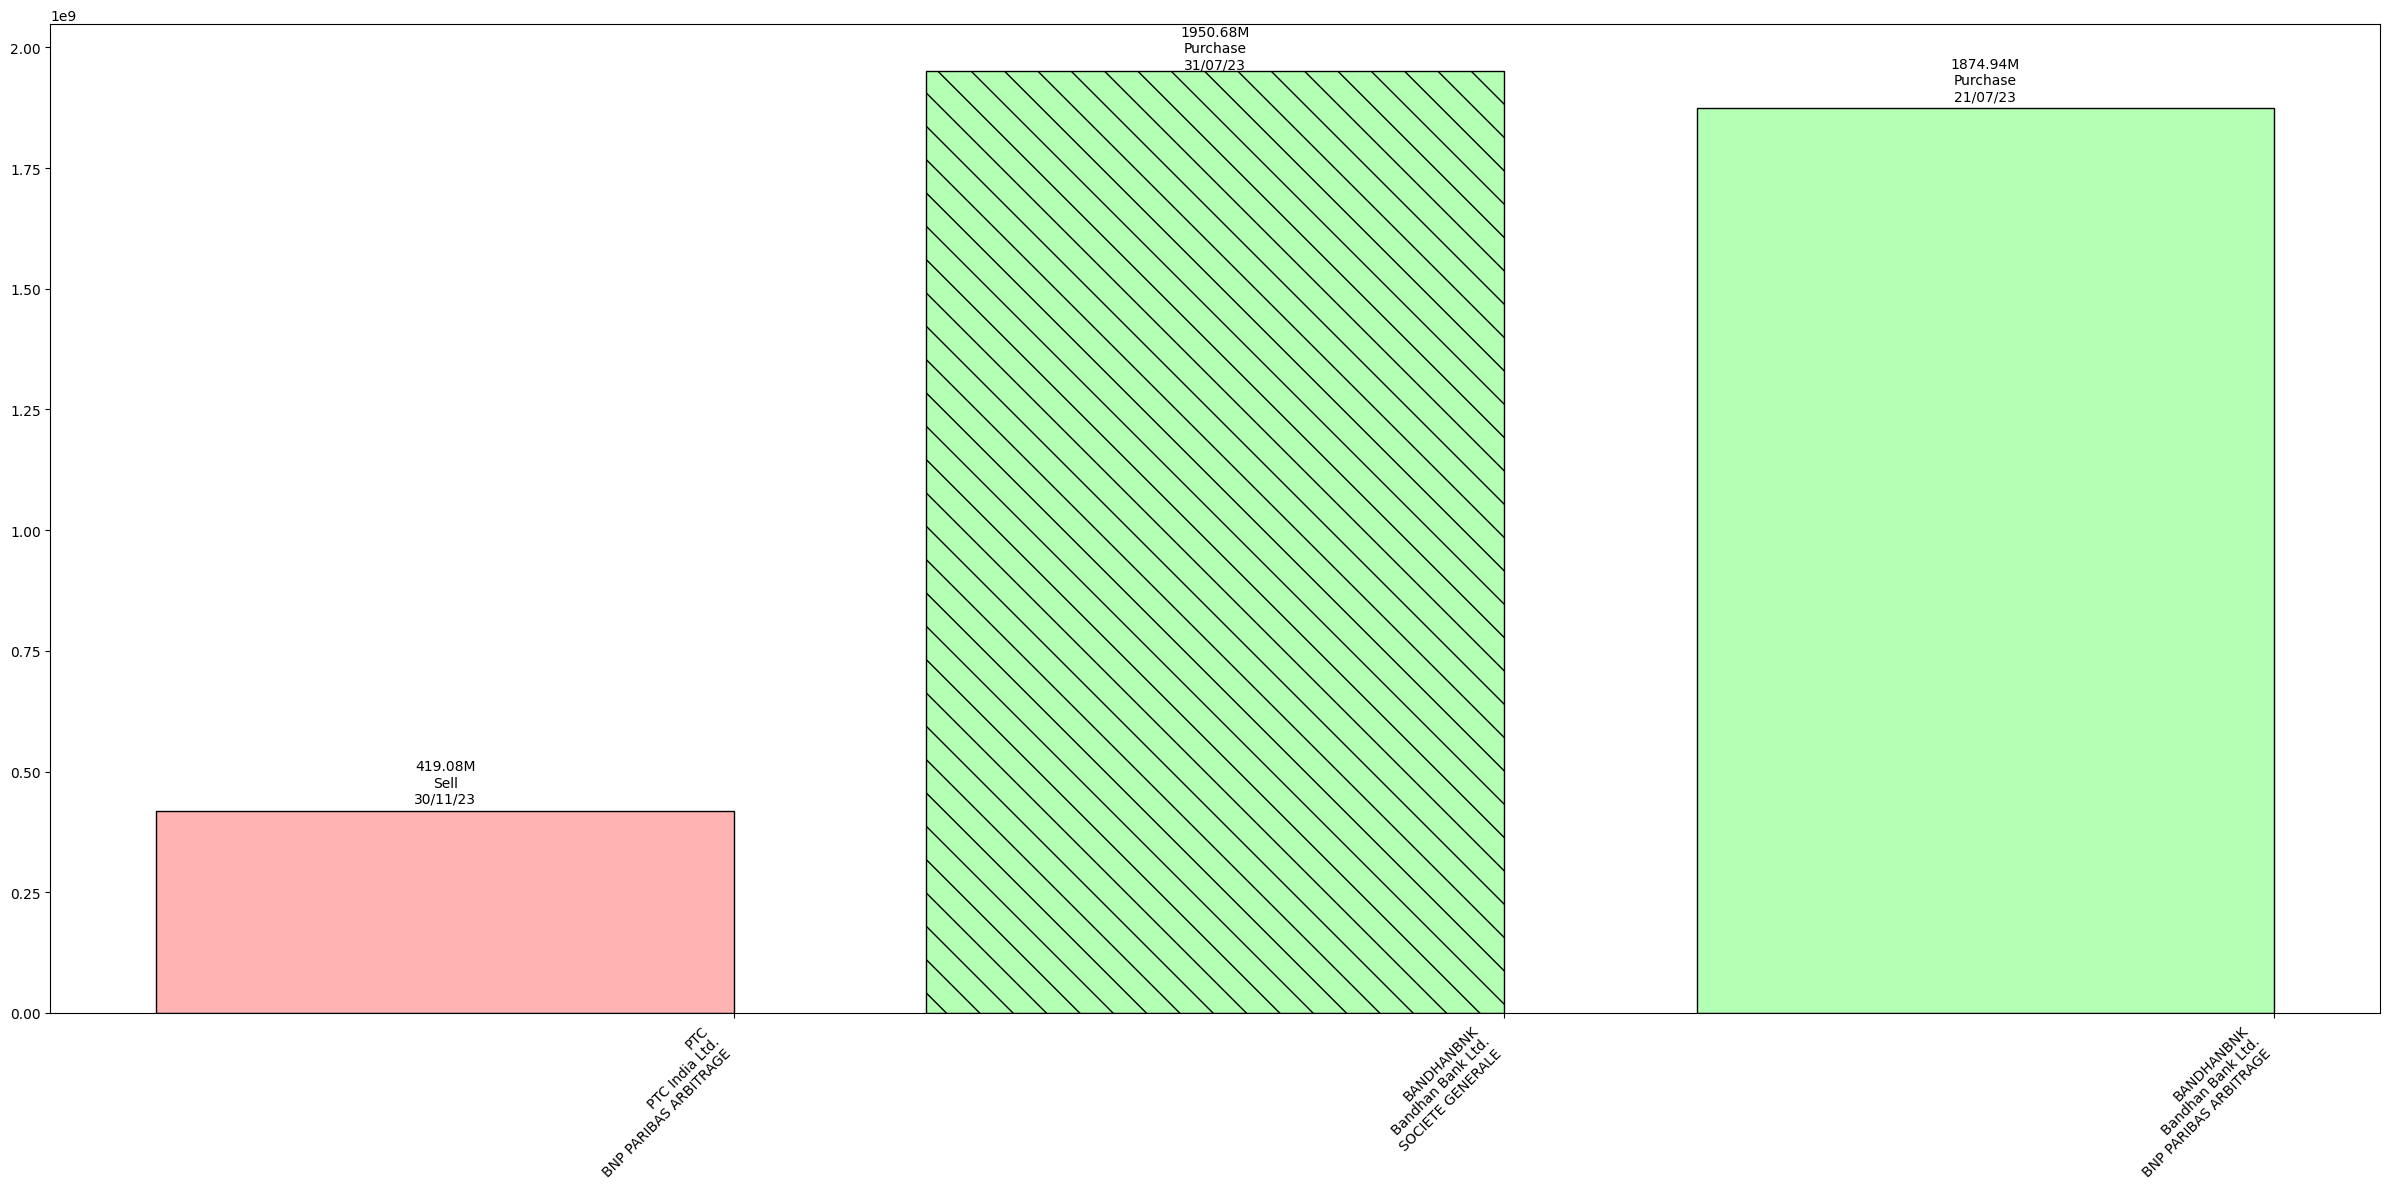


Sheet Name: Insider Disclosures


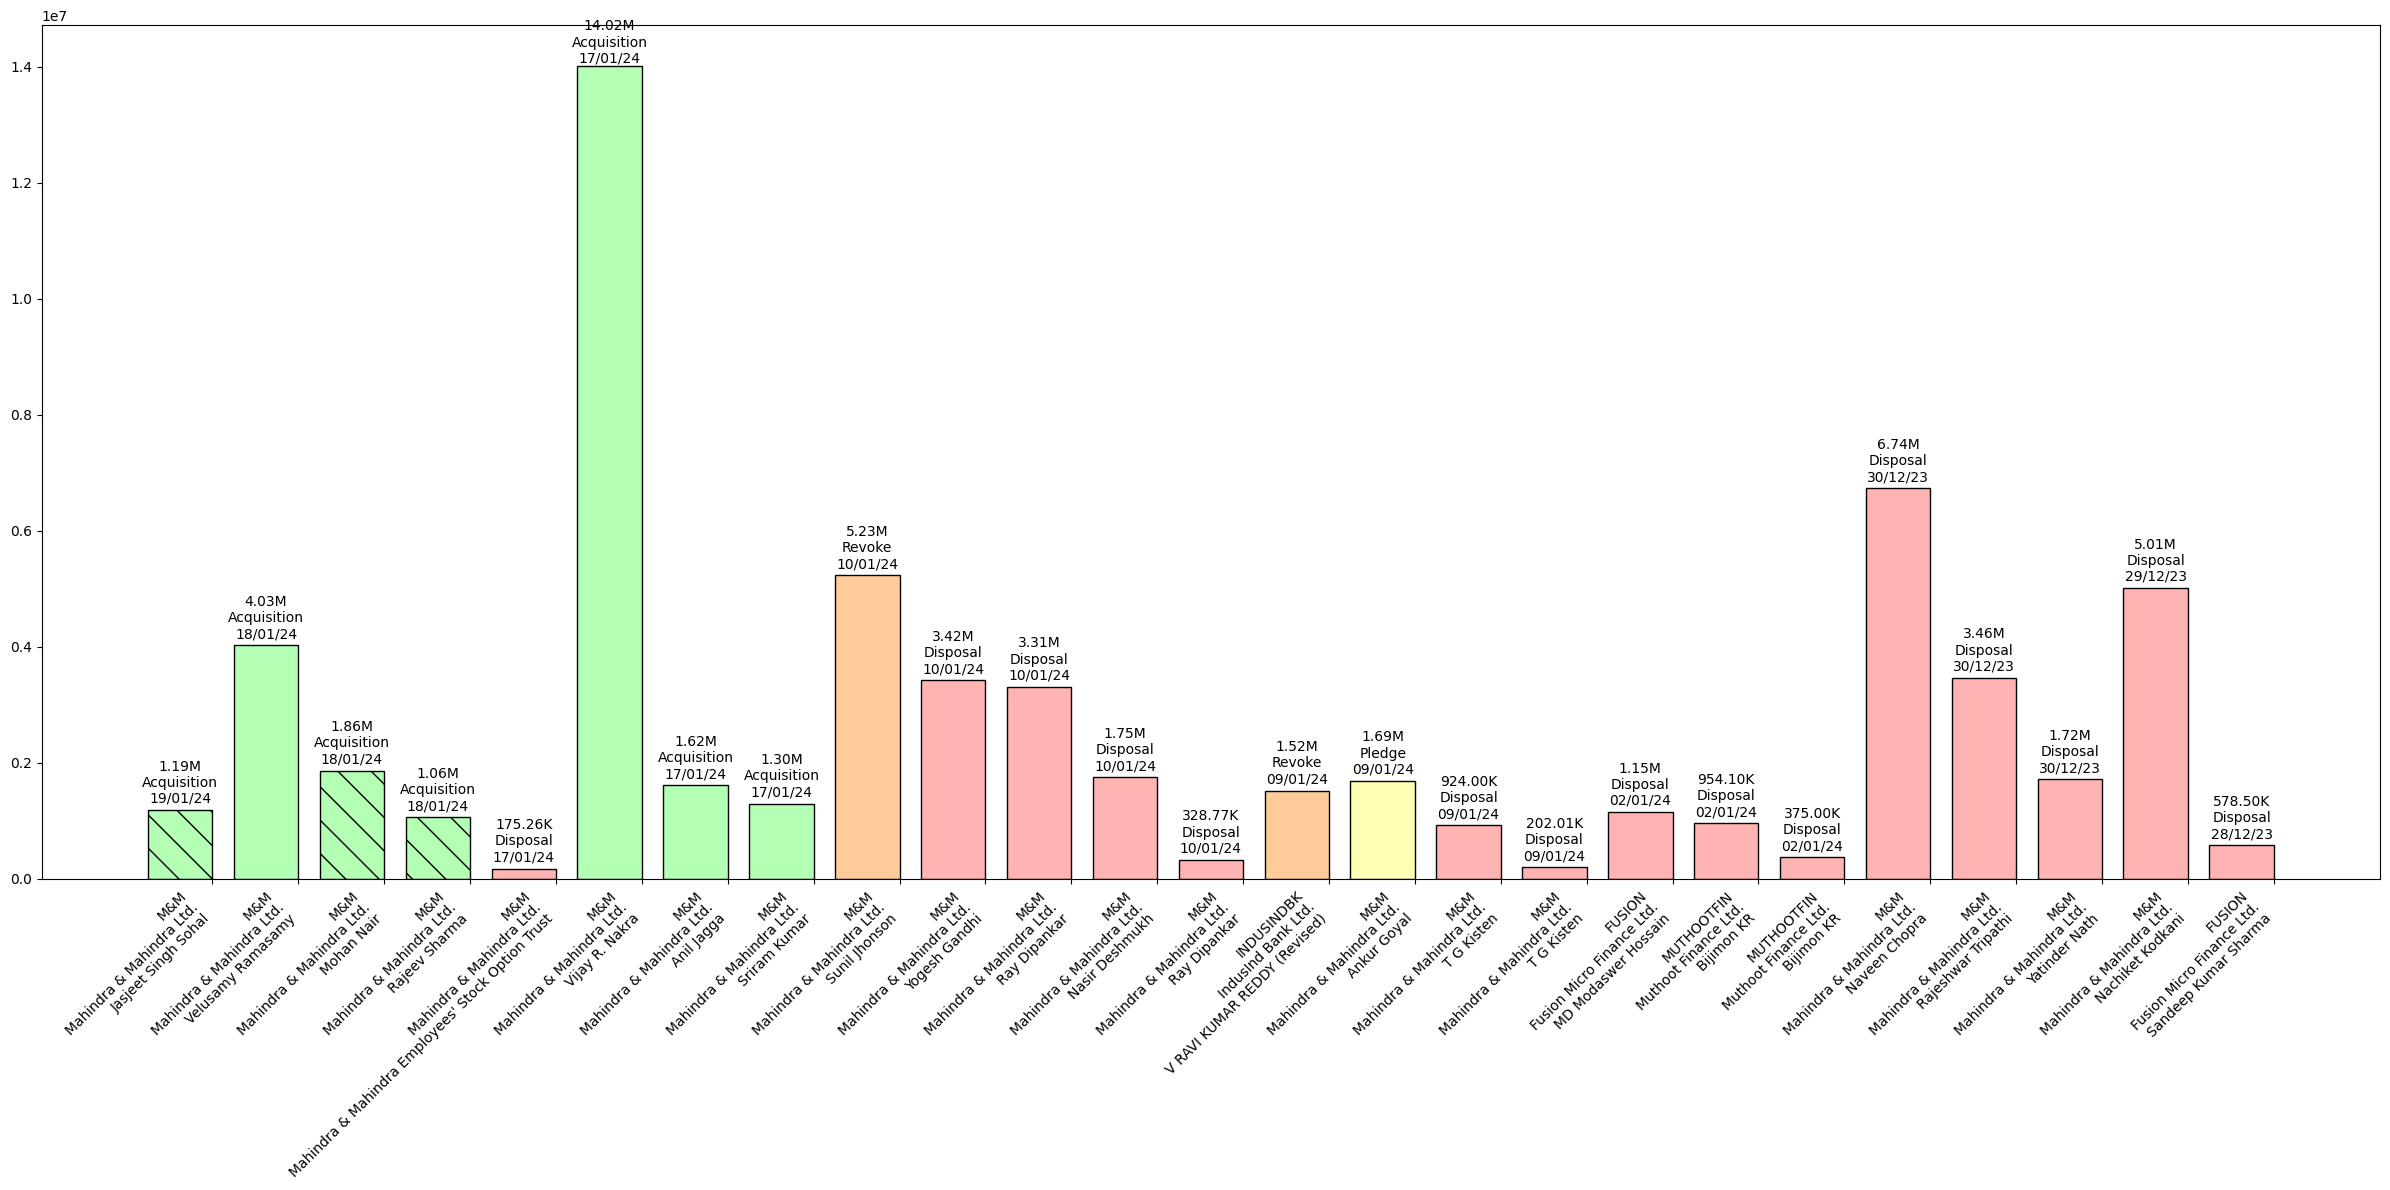

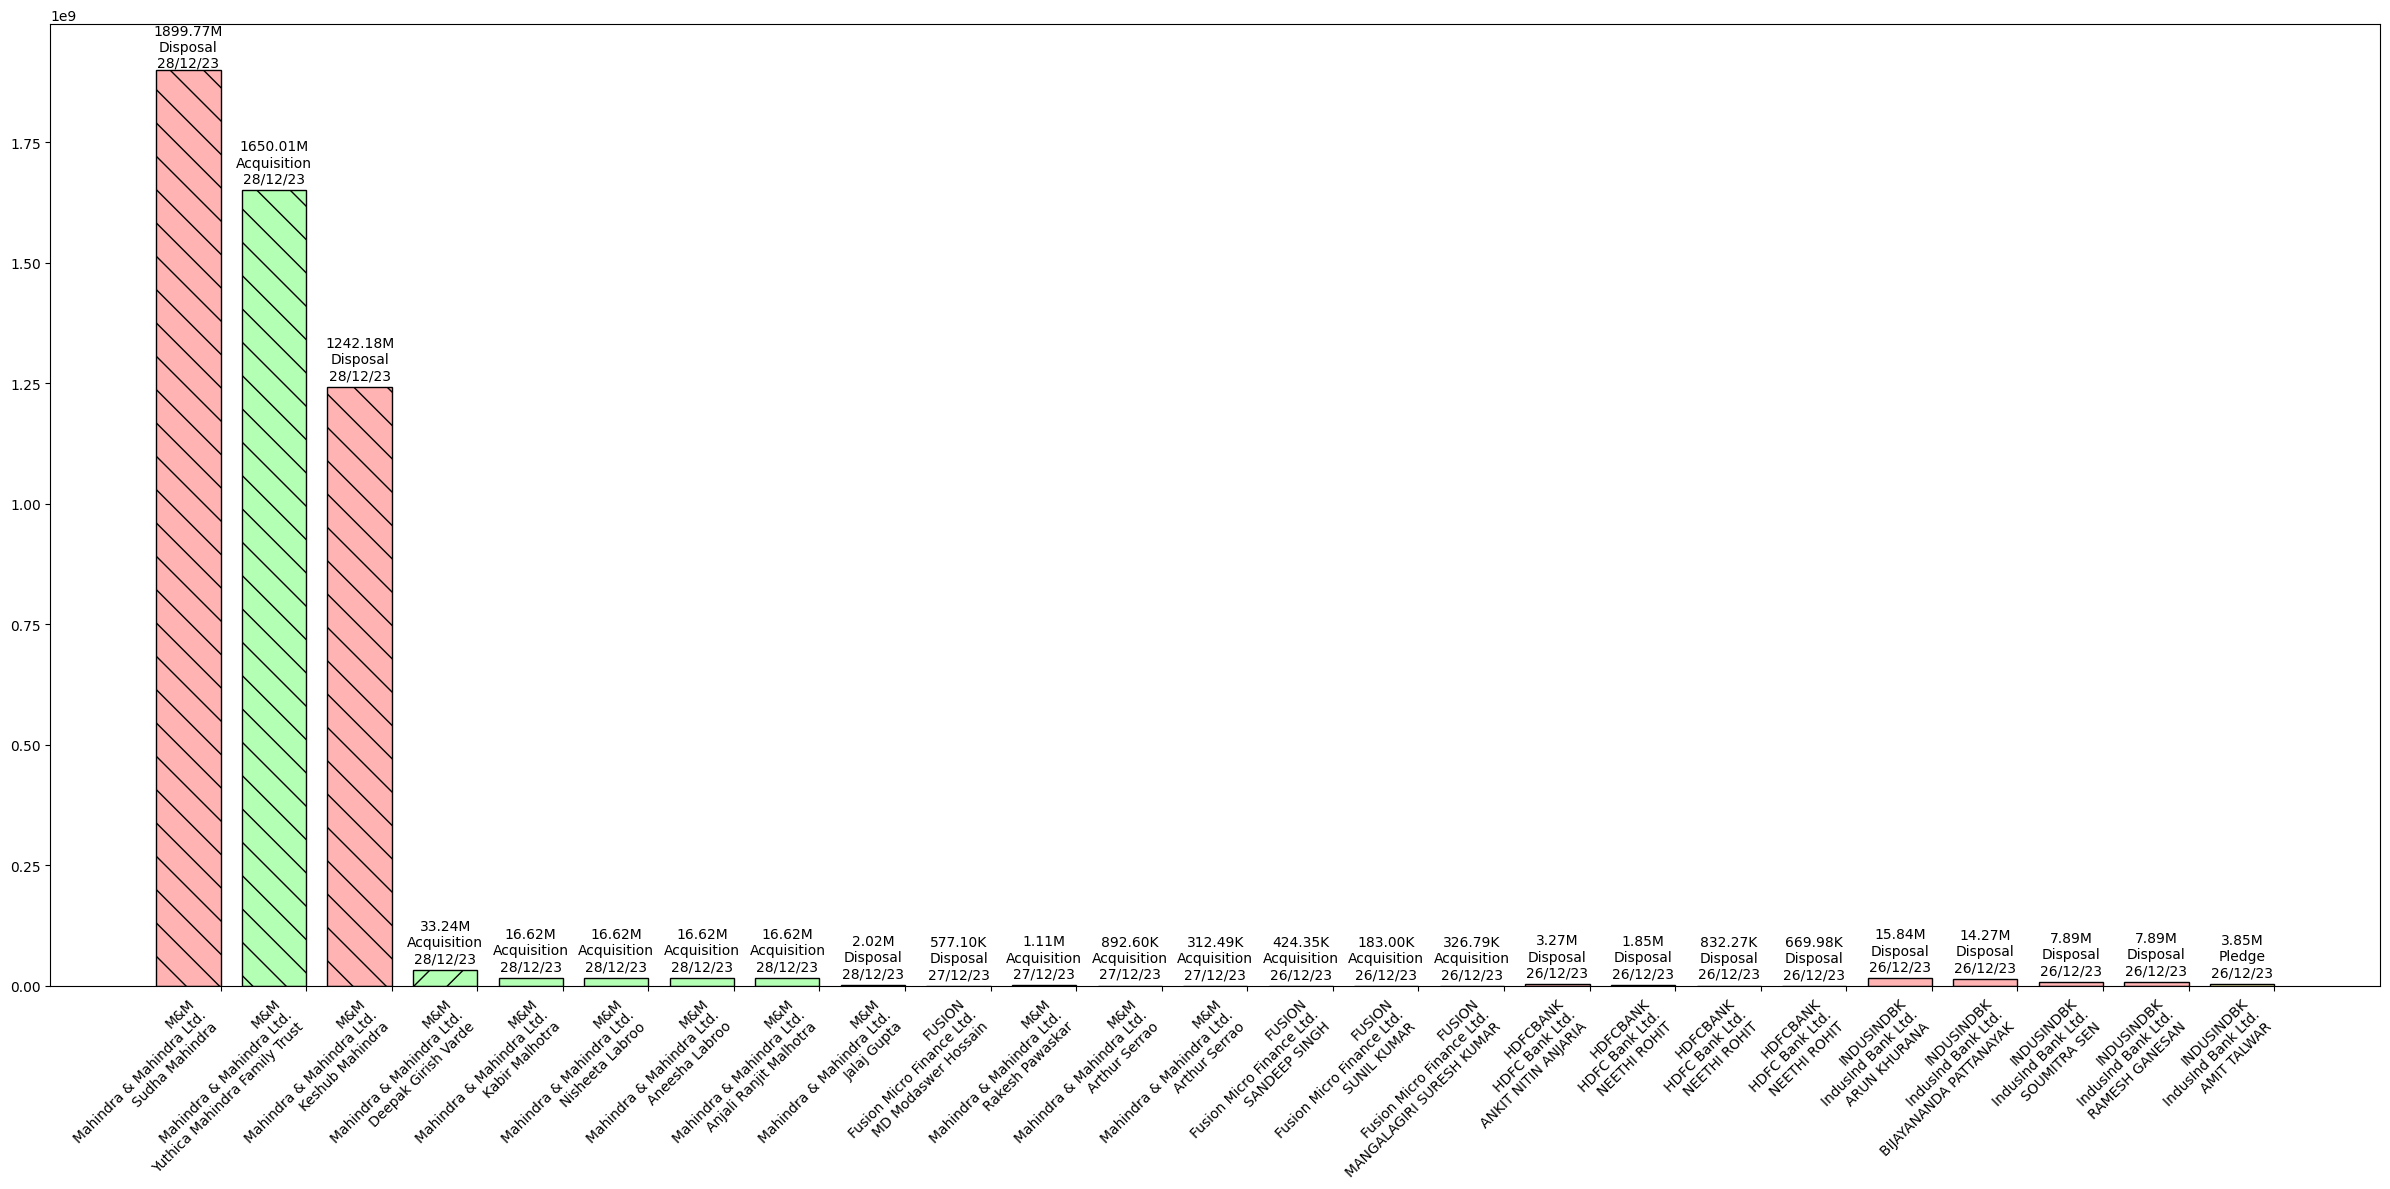

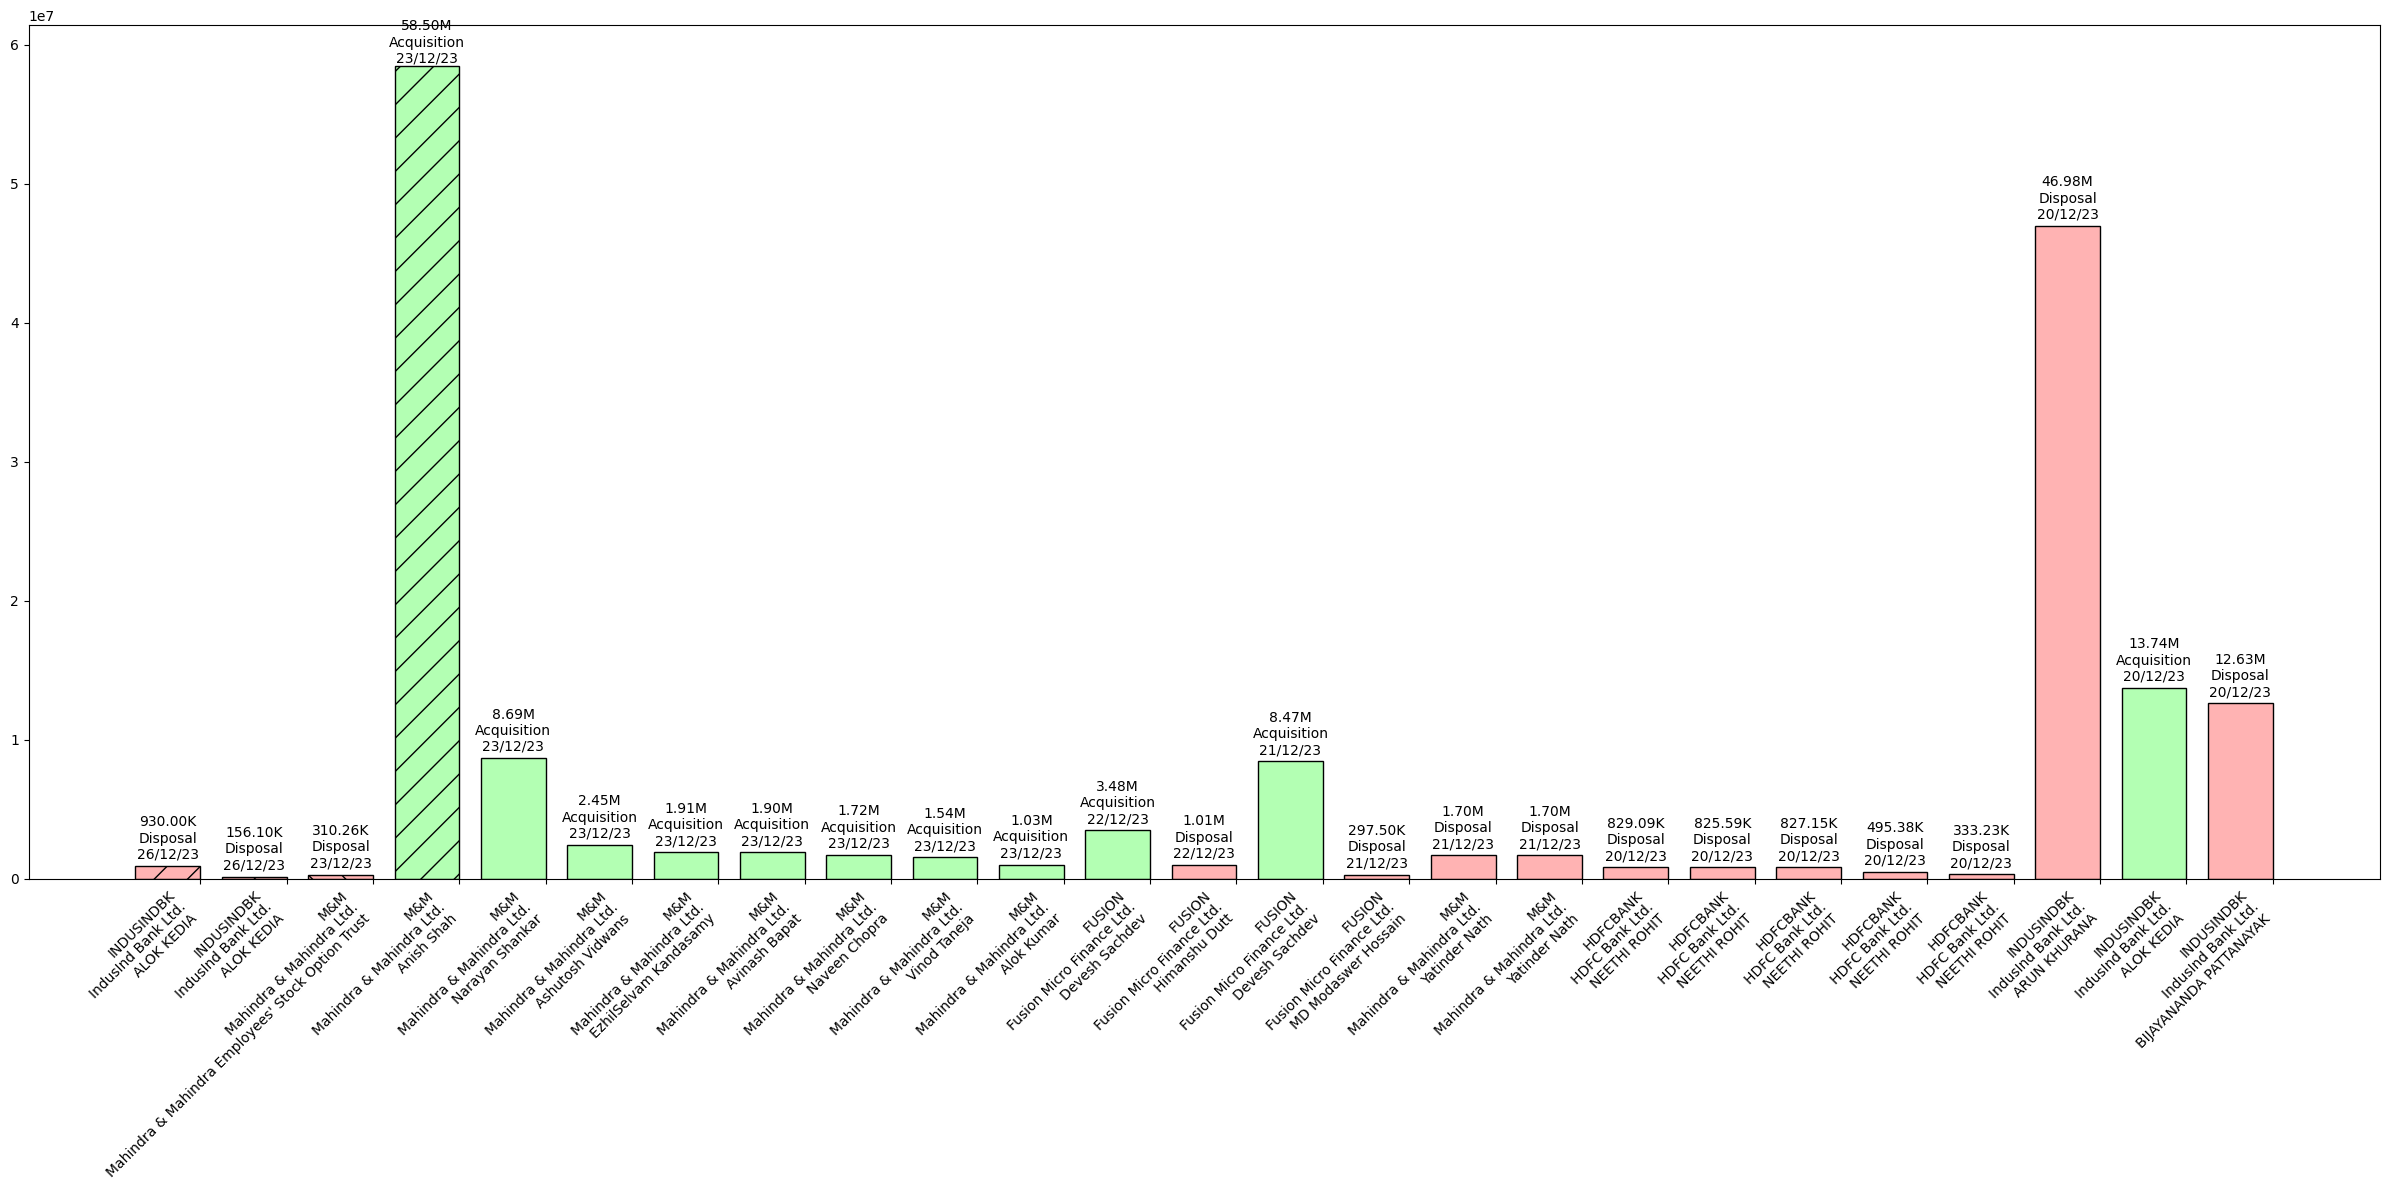

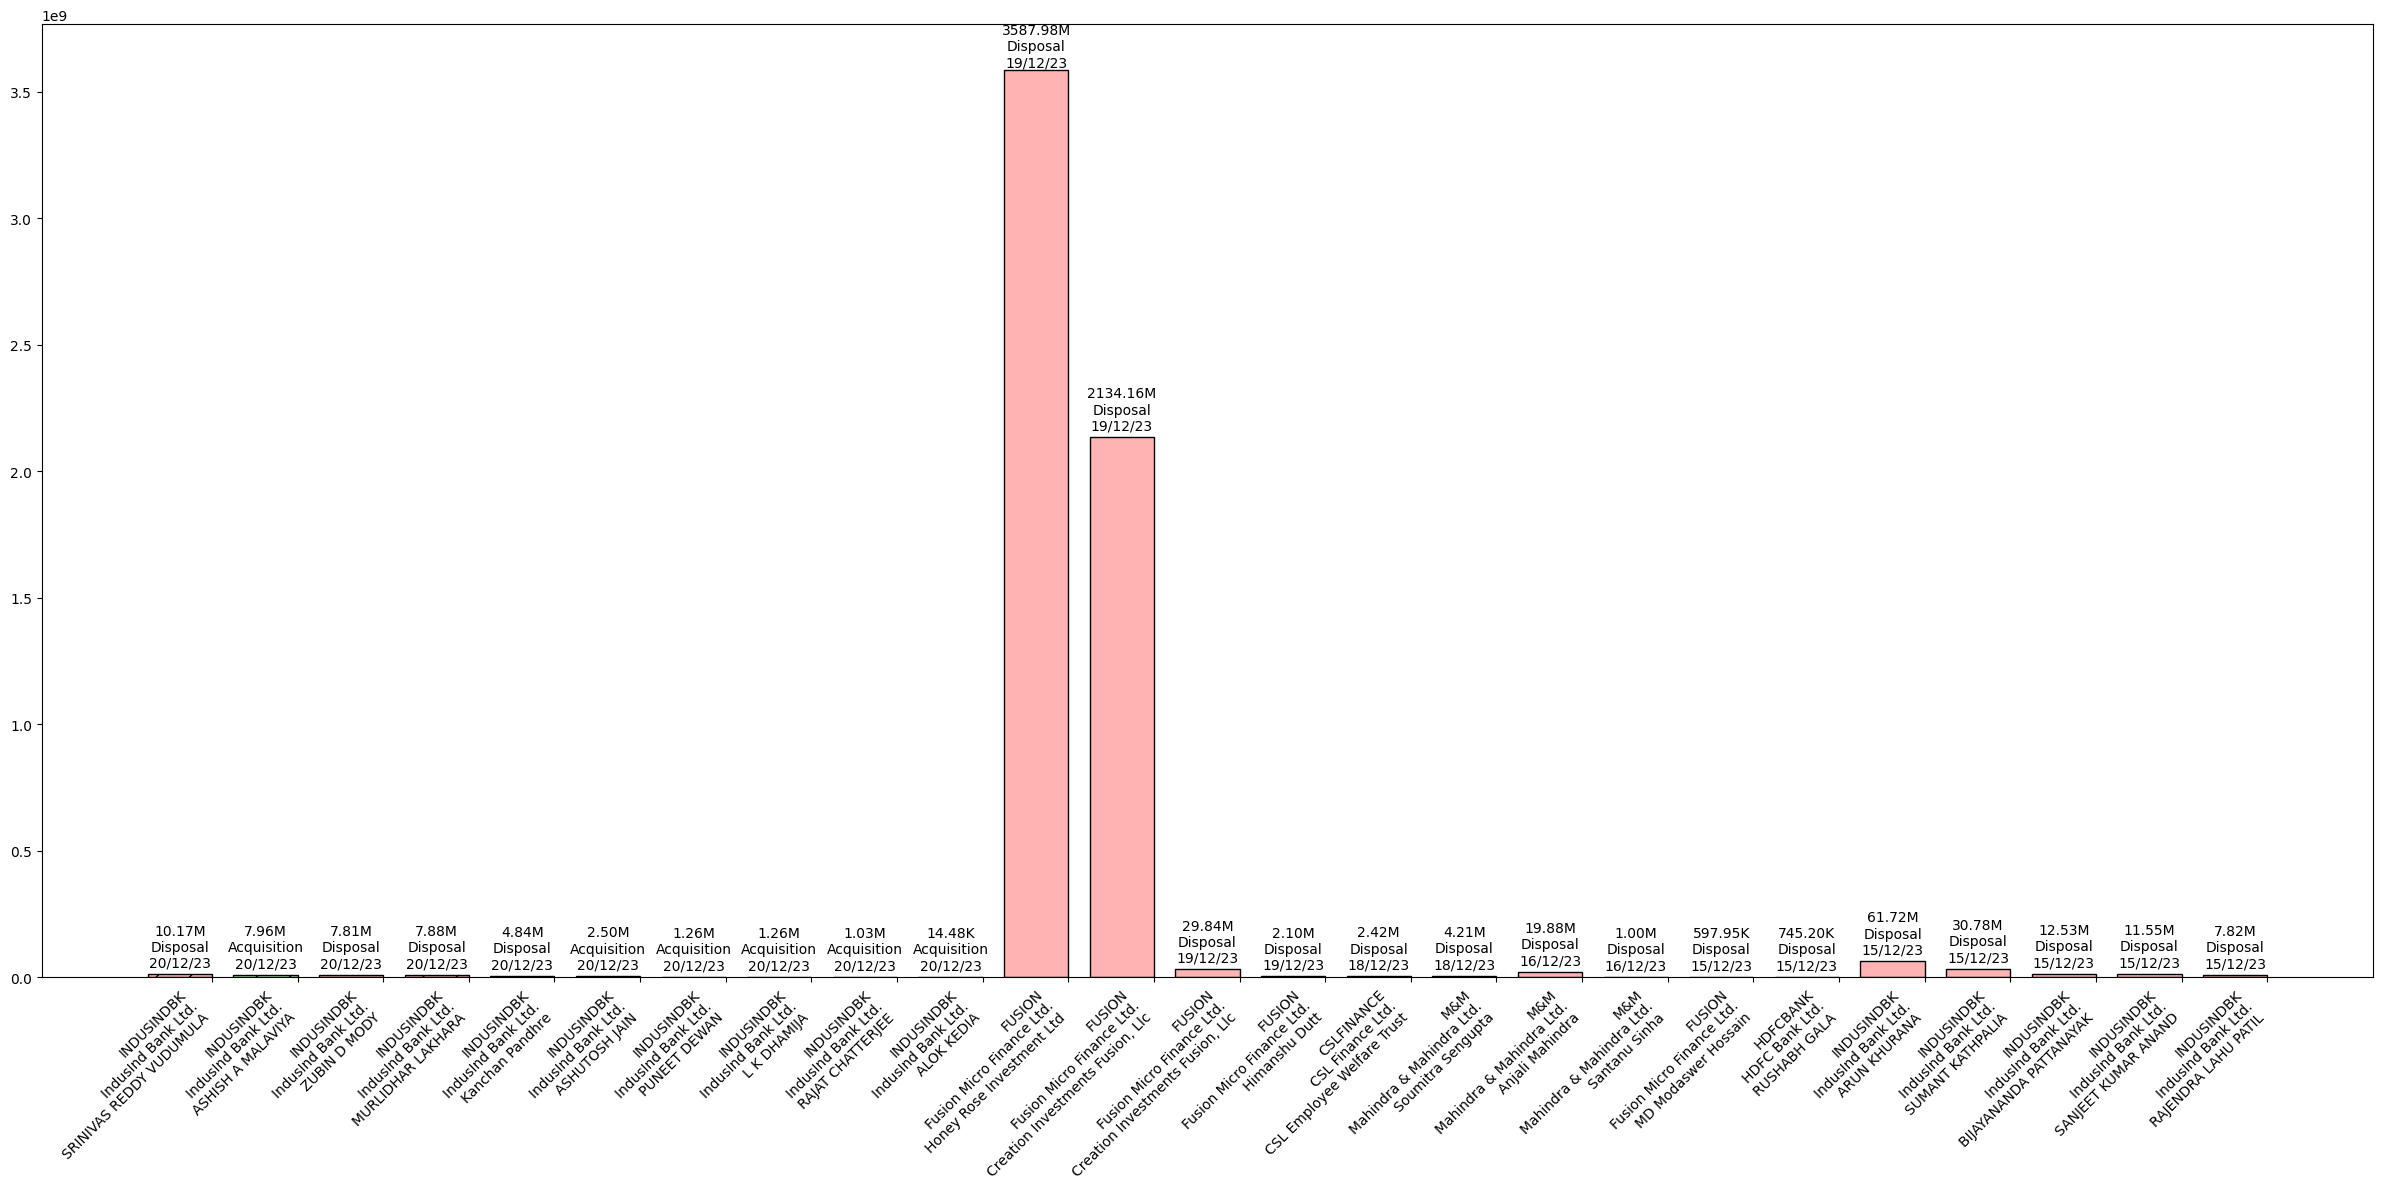

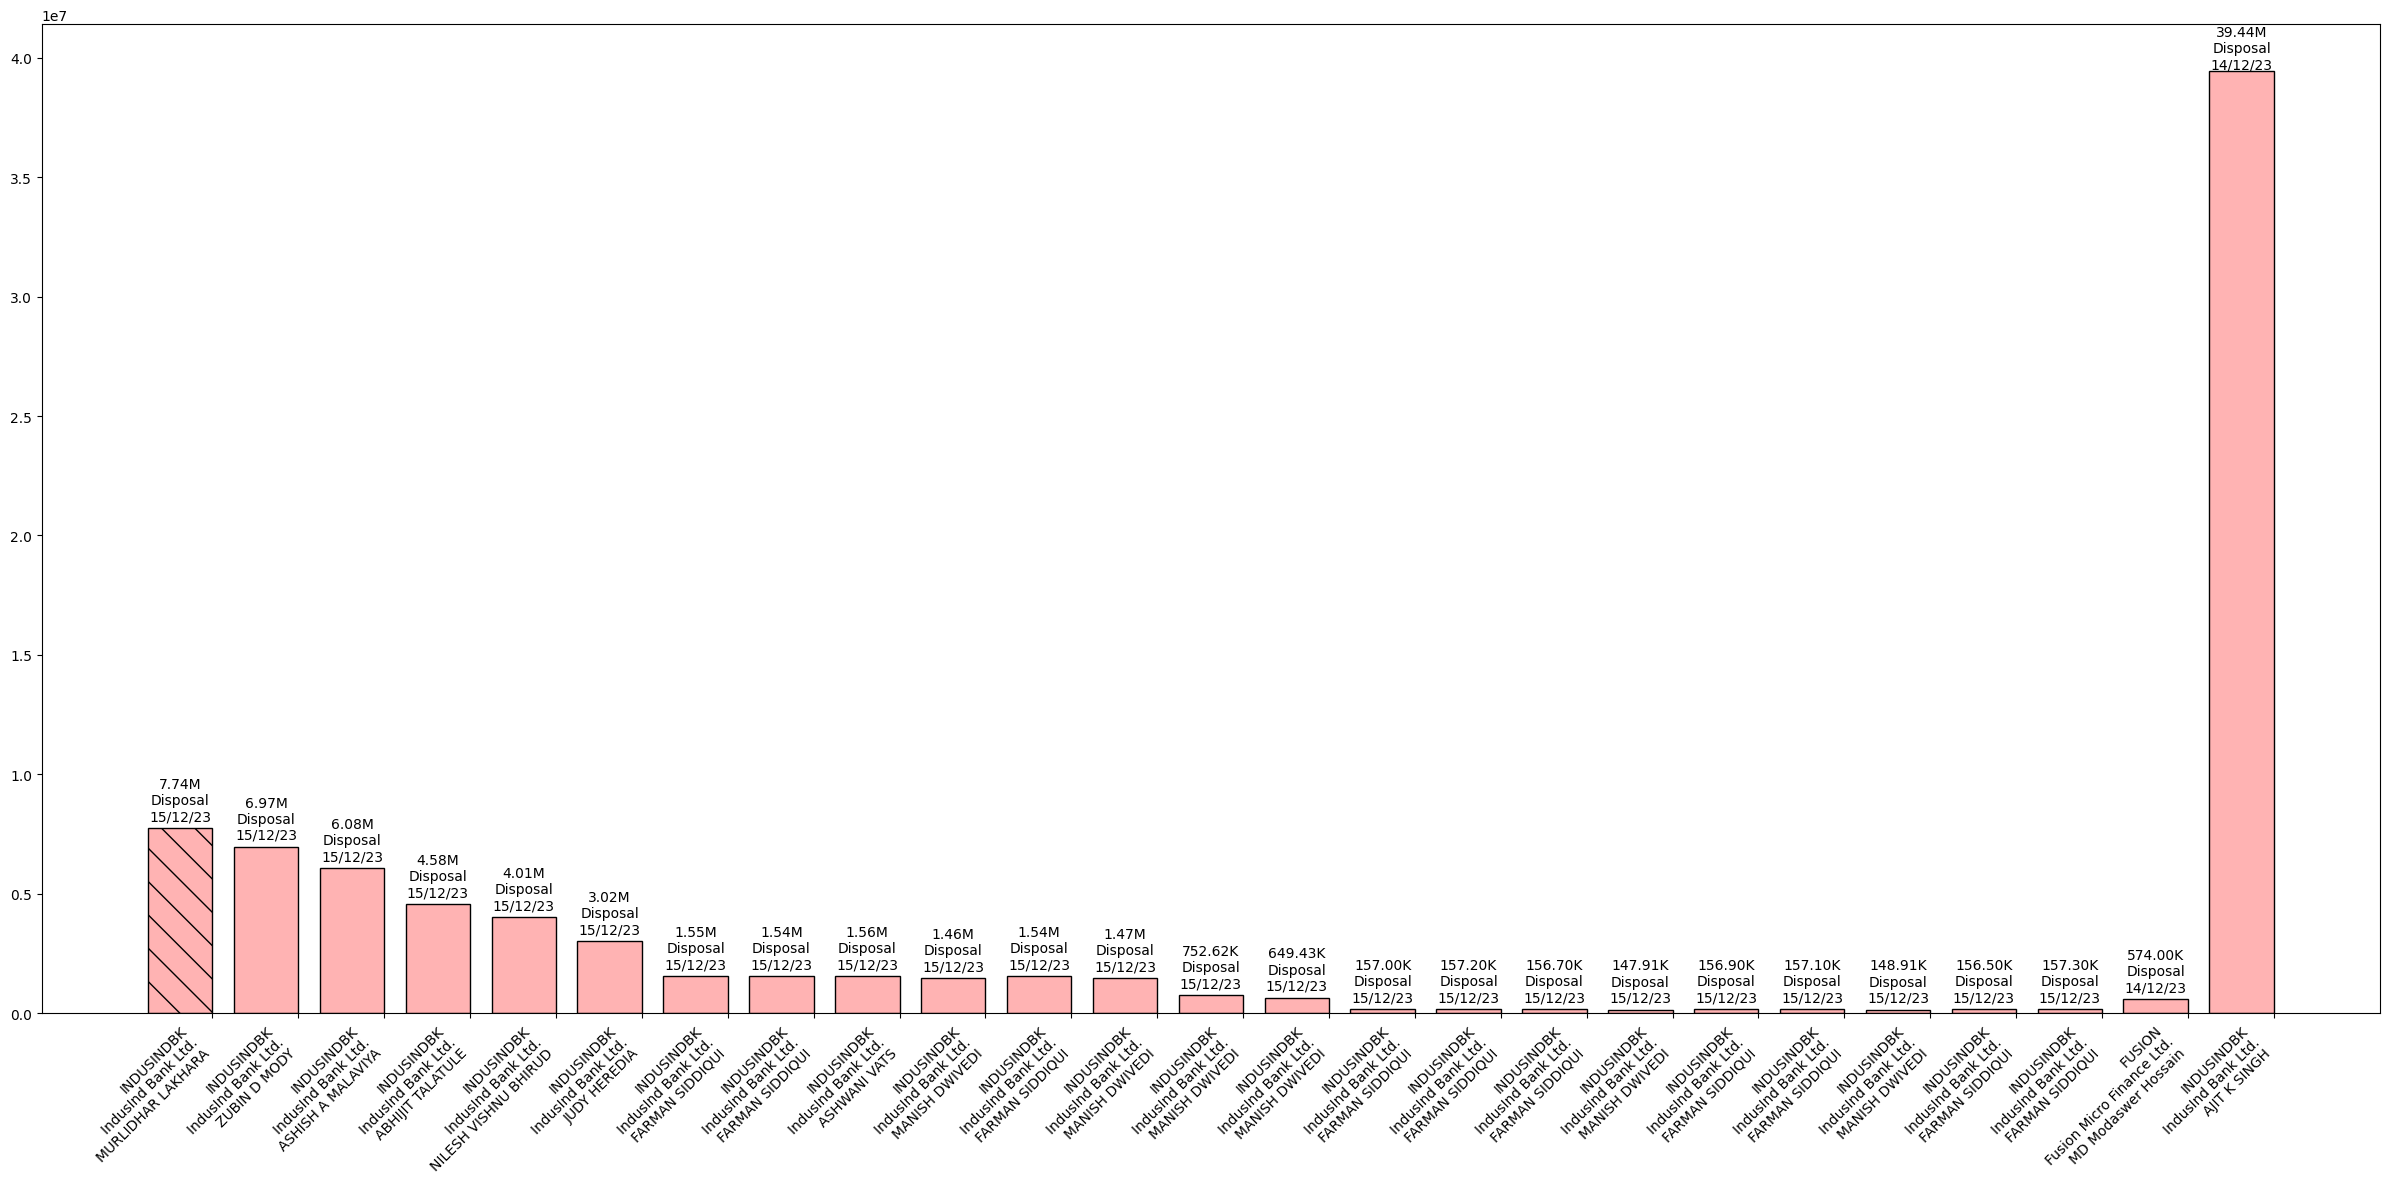

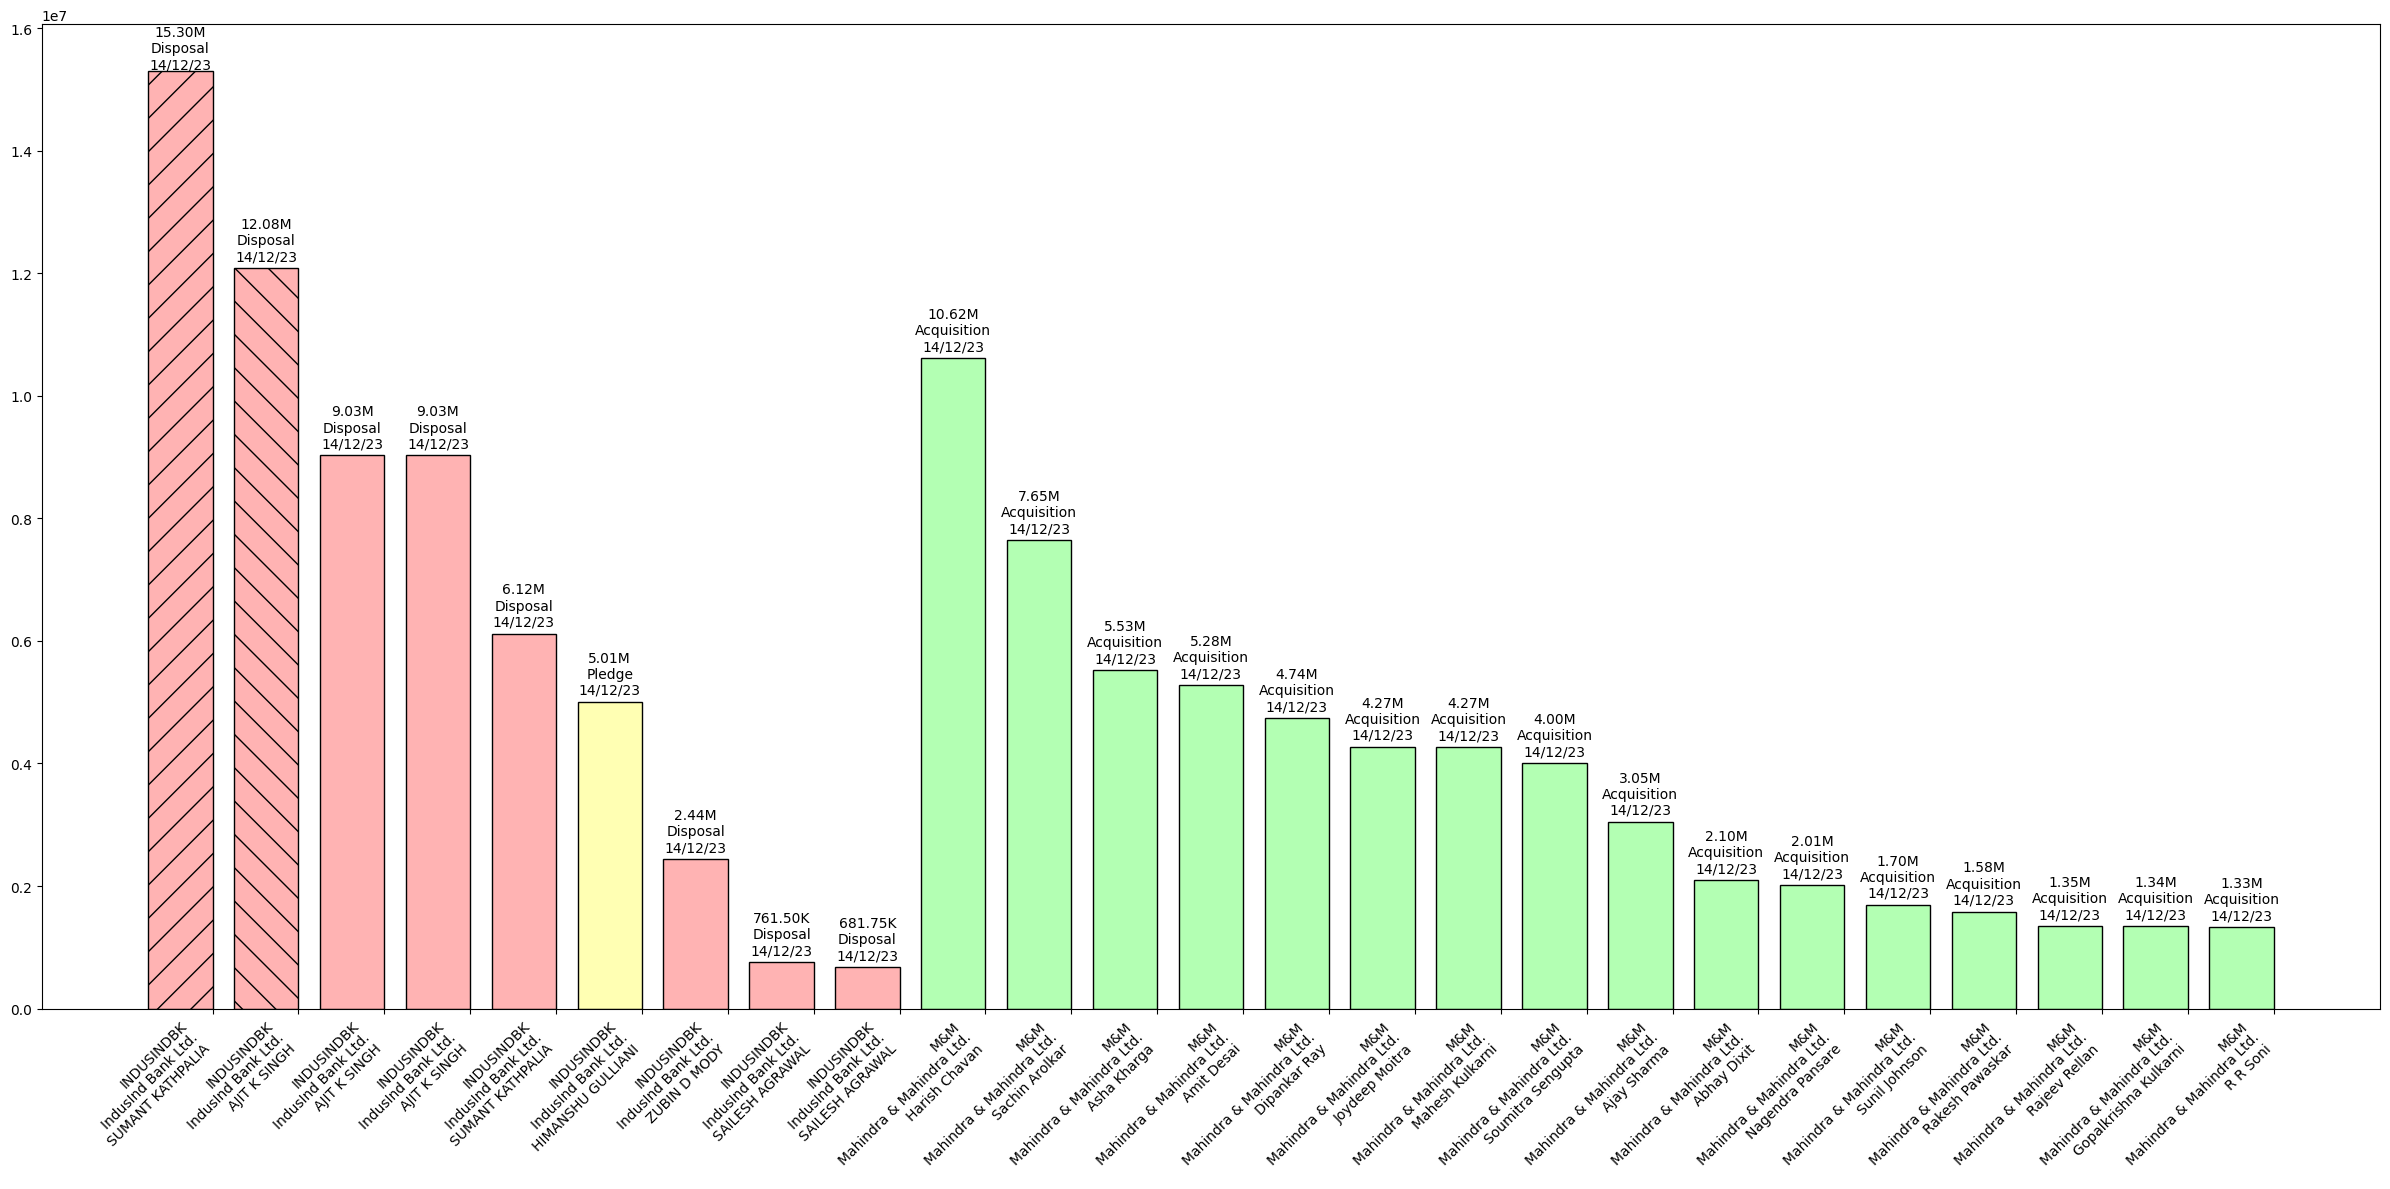

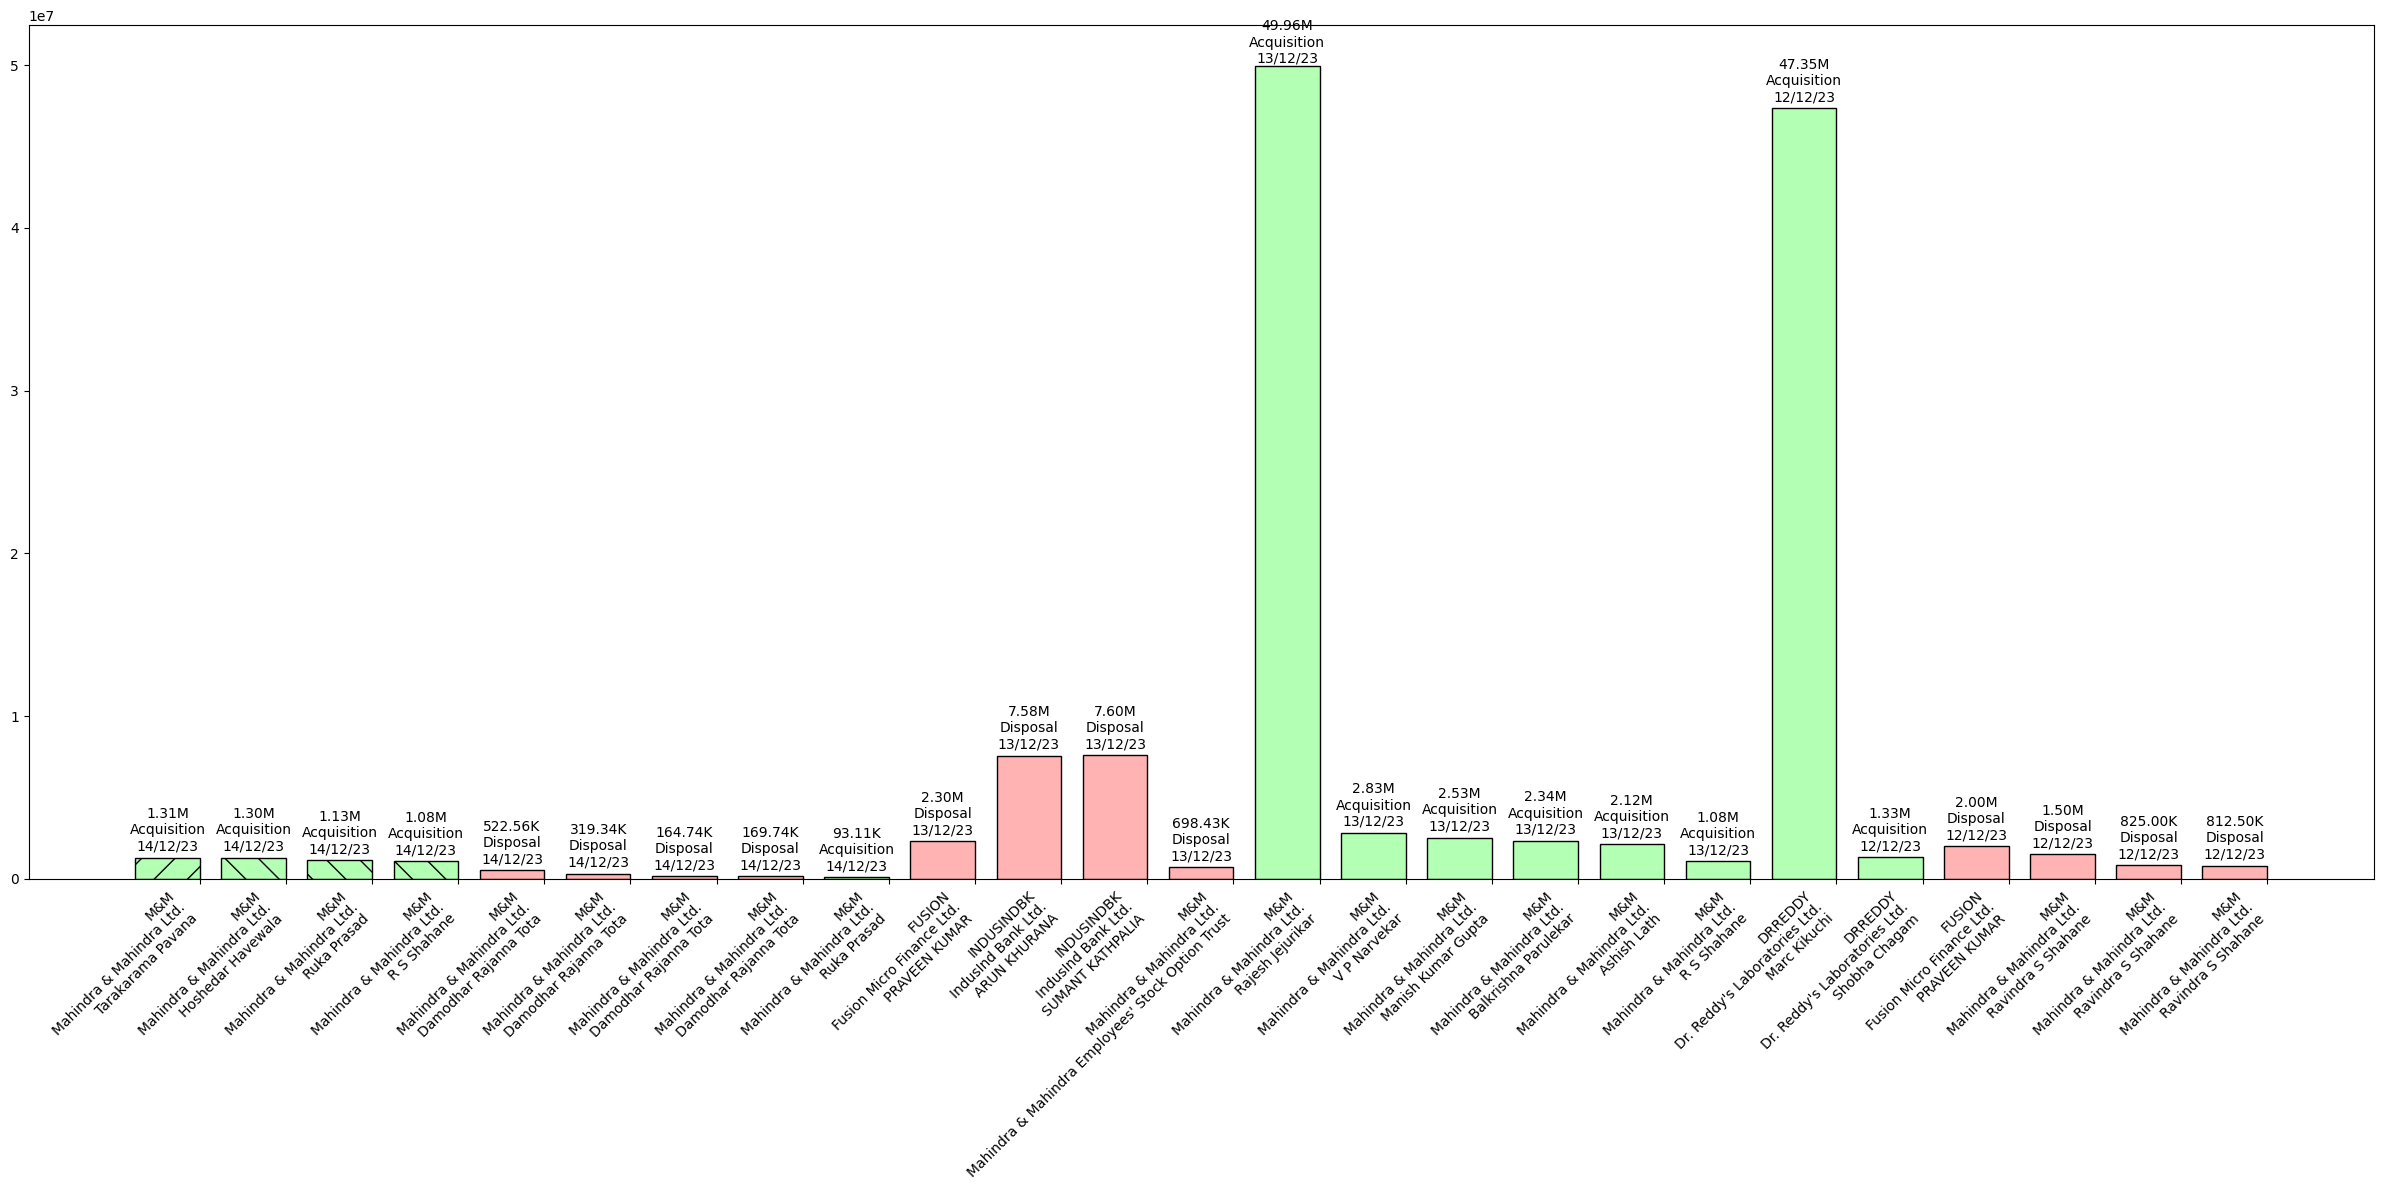

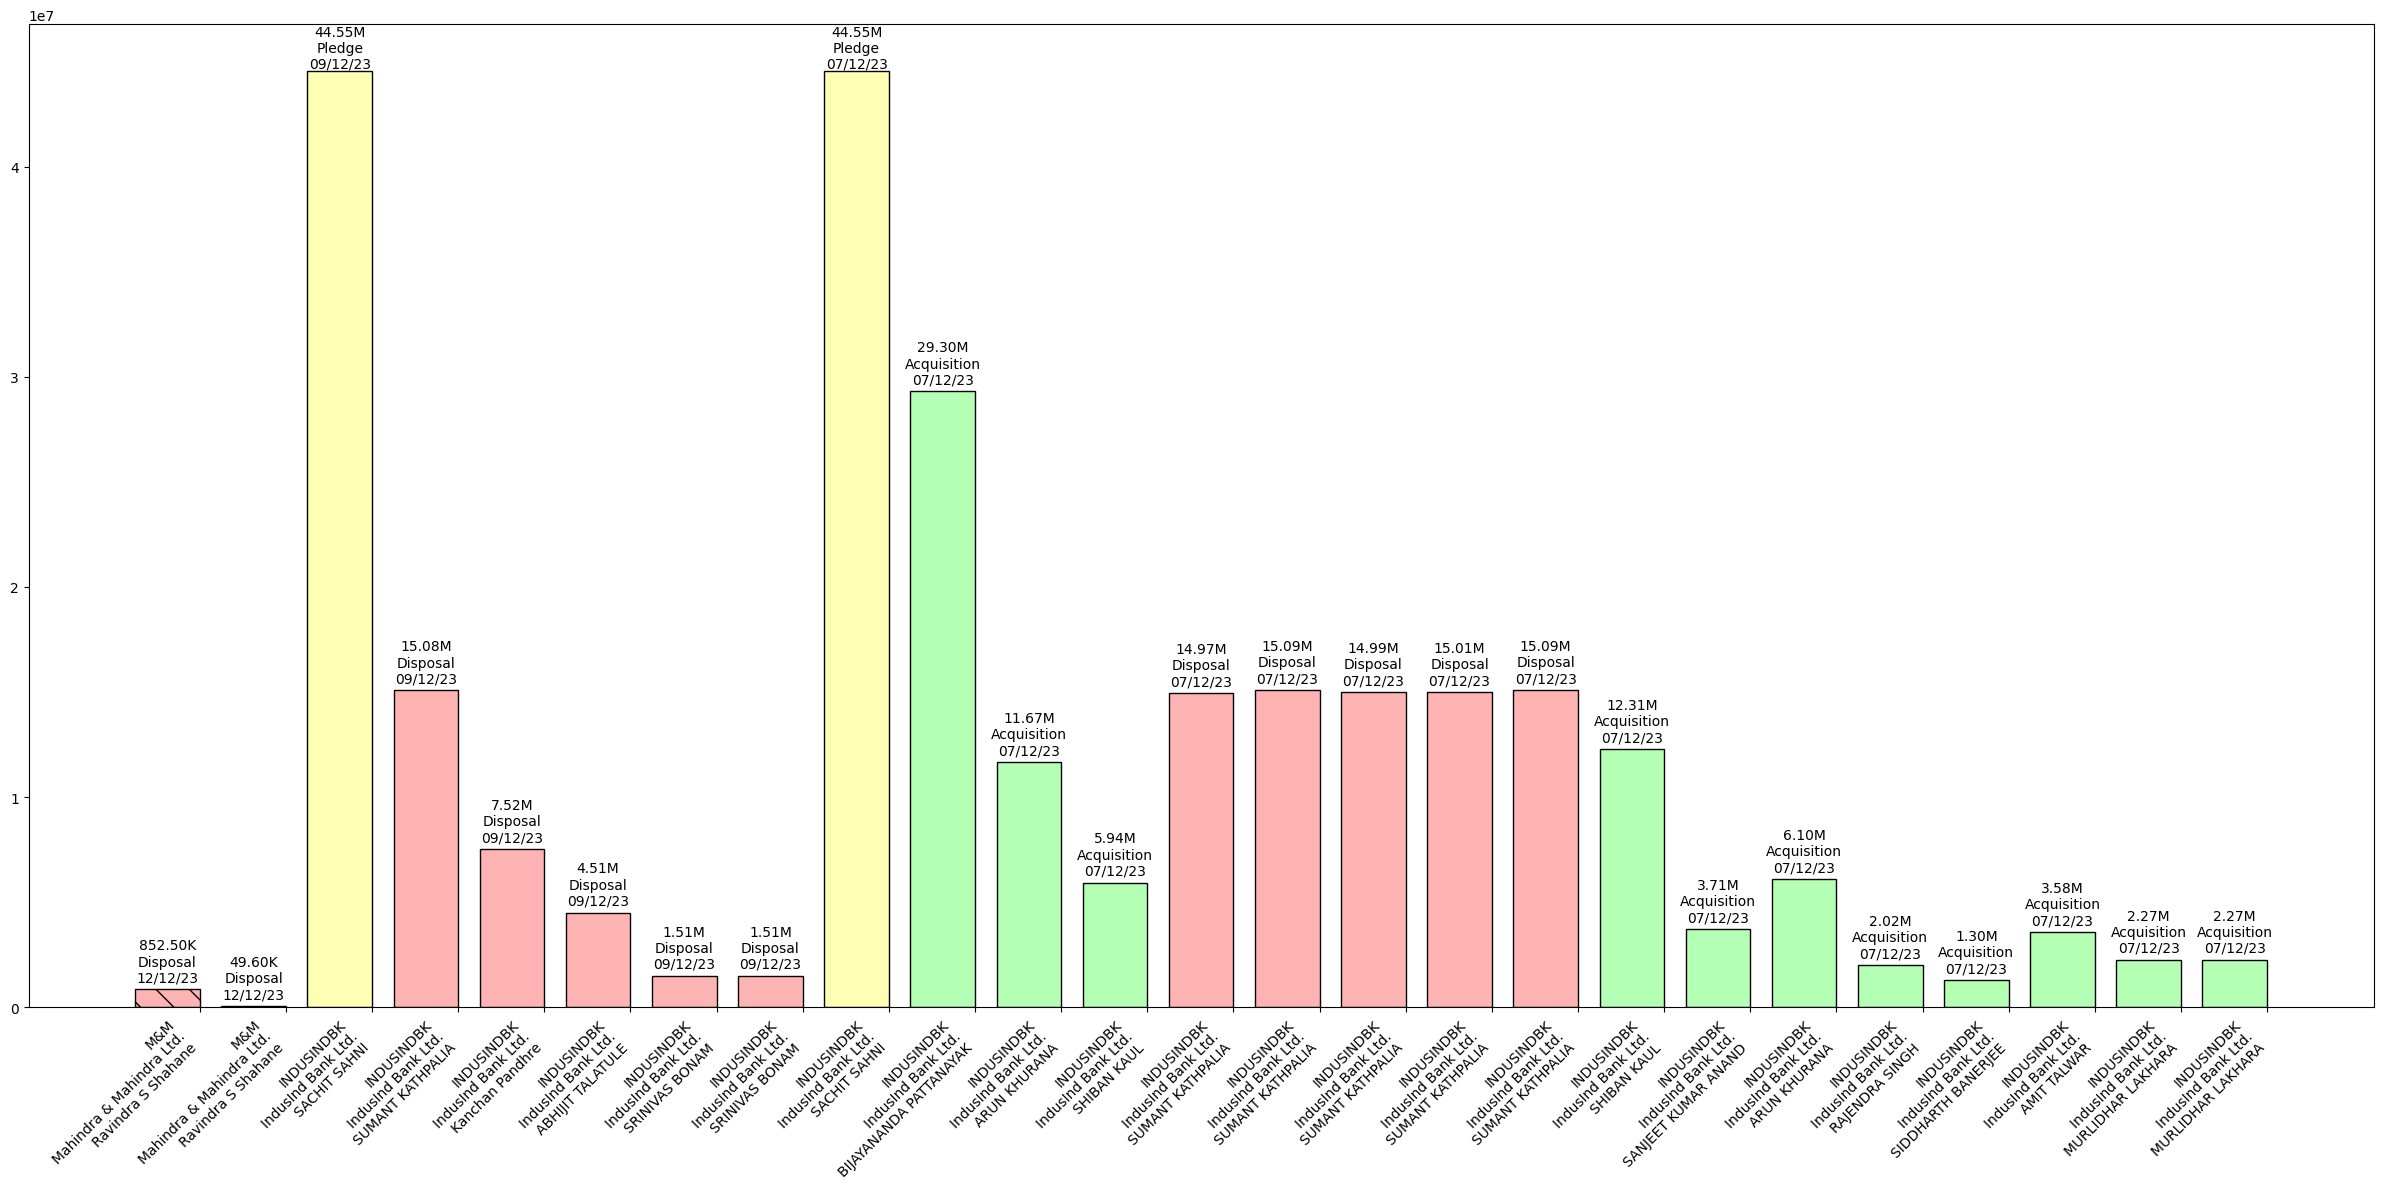

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


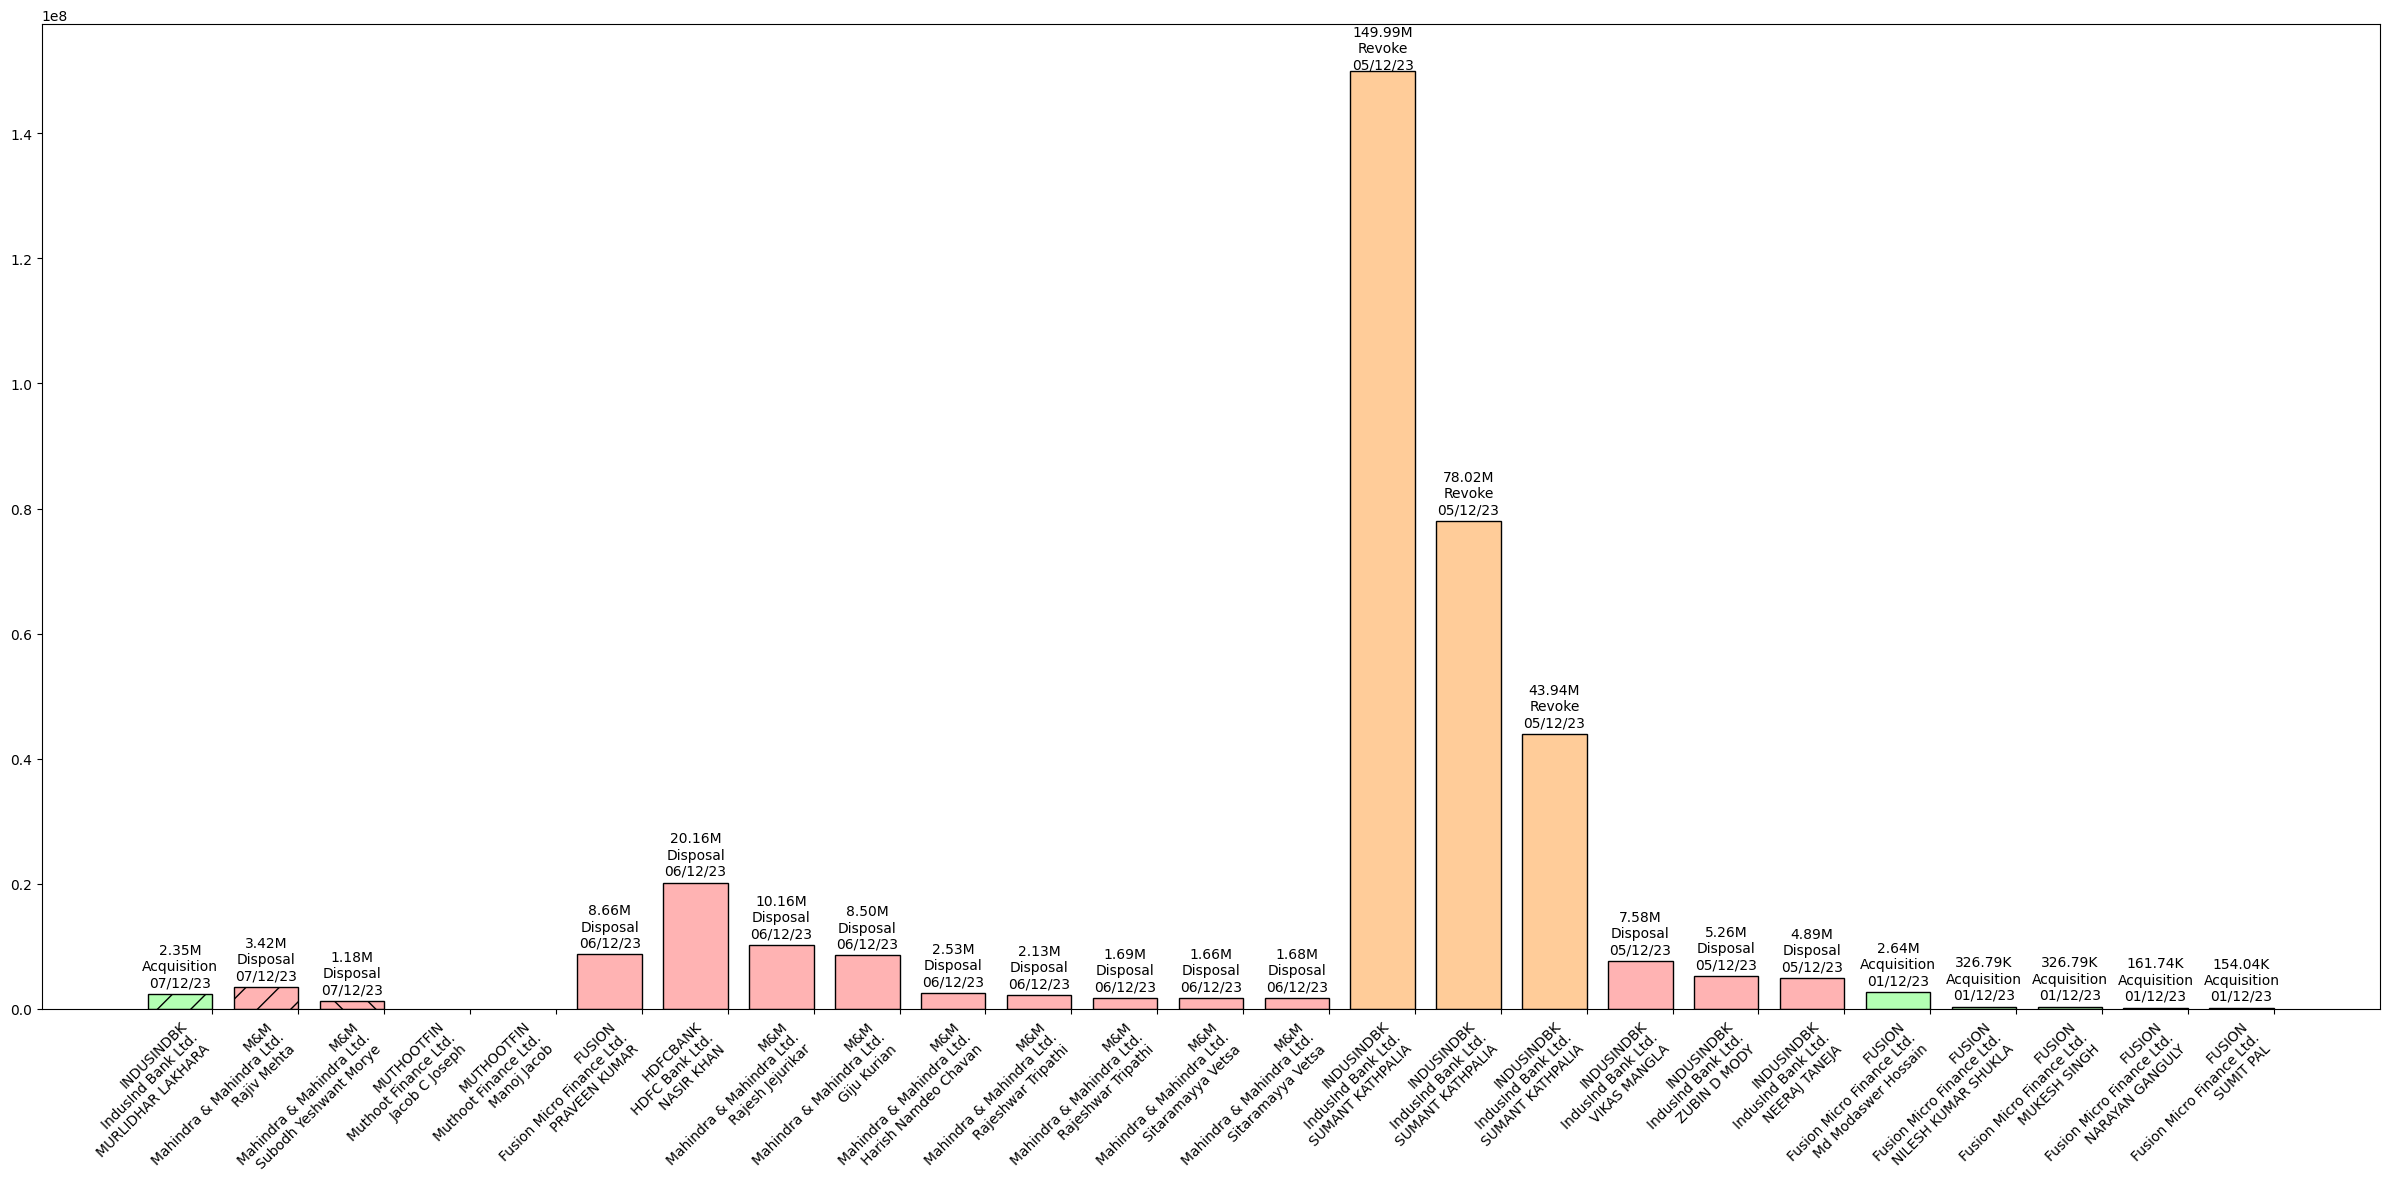

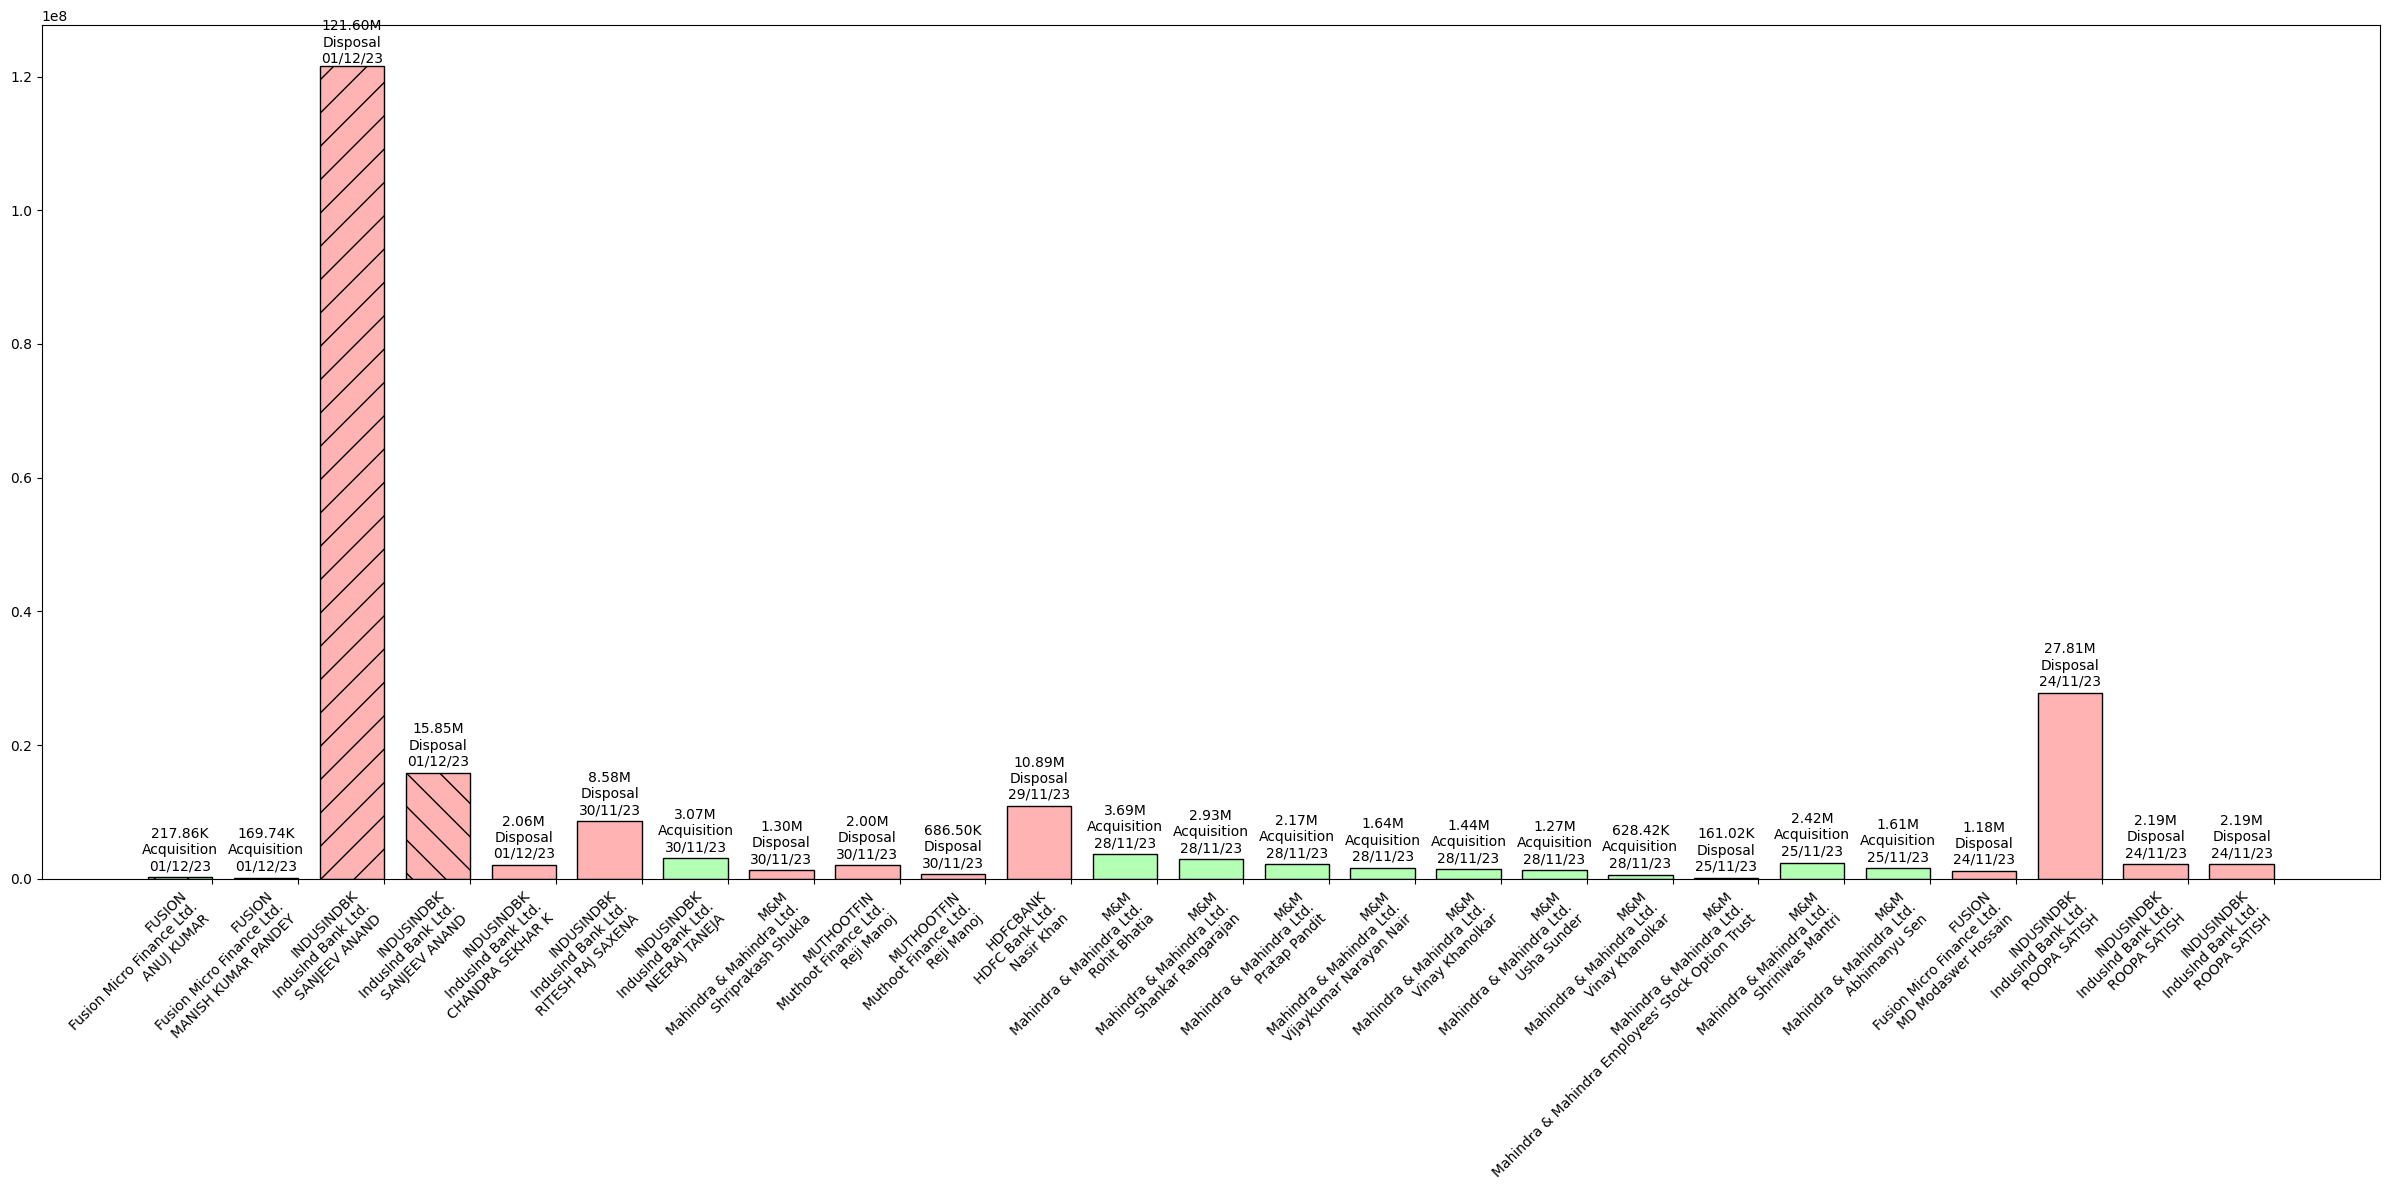


Special Clients:


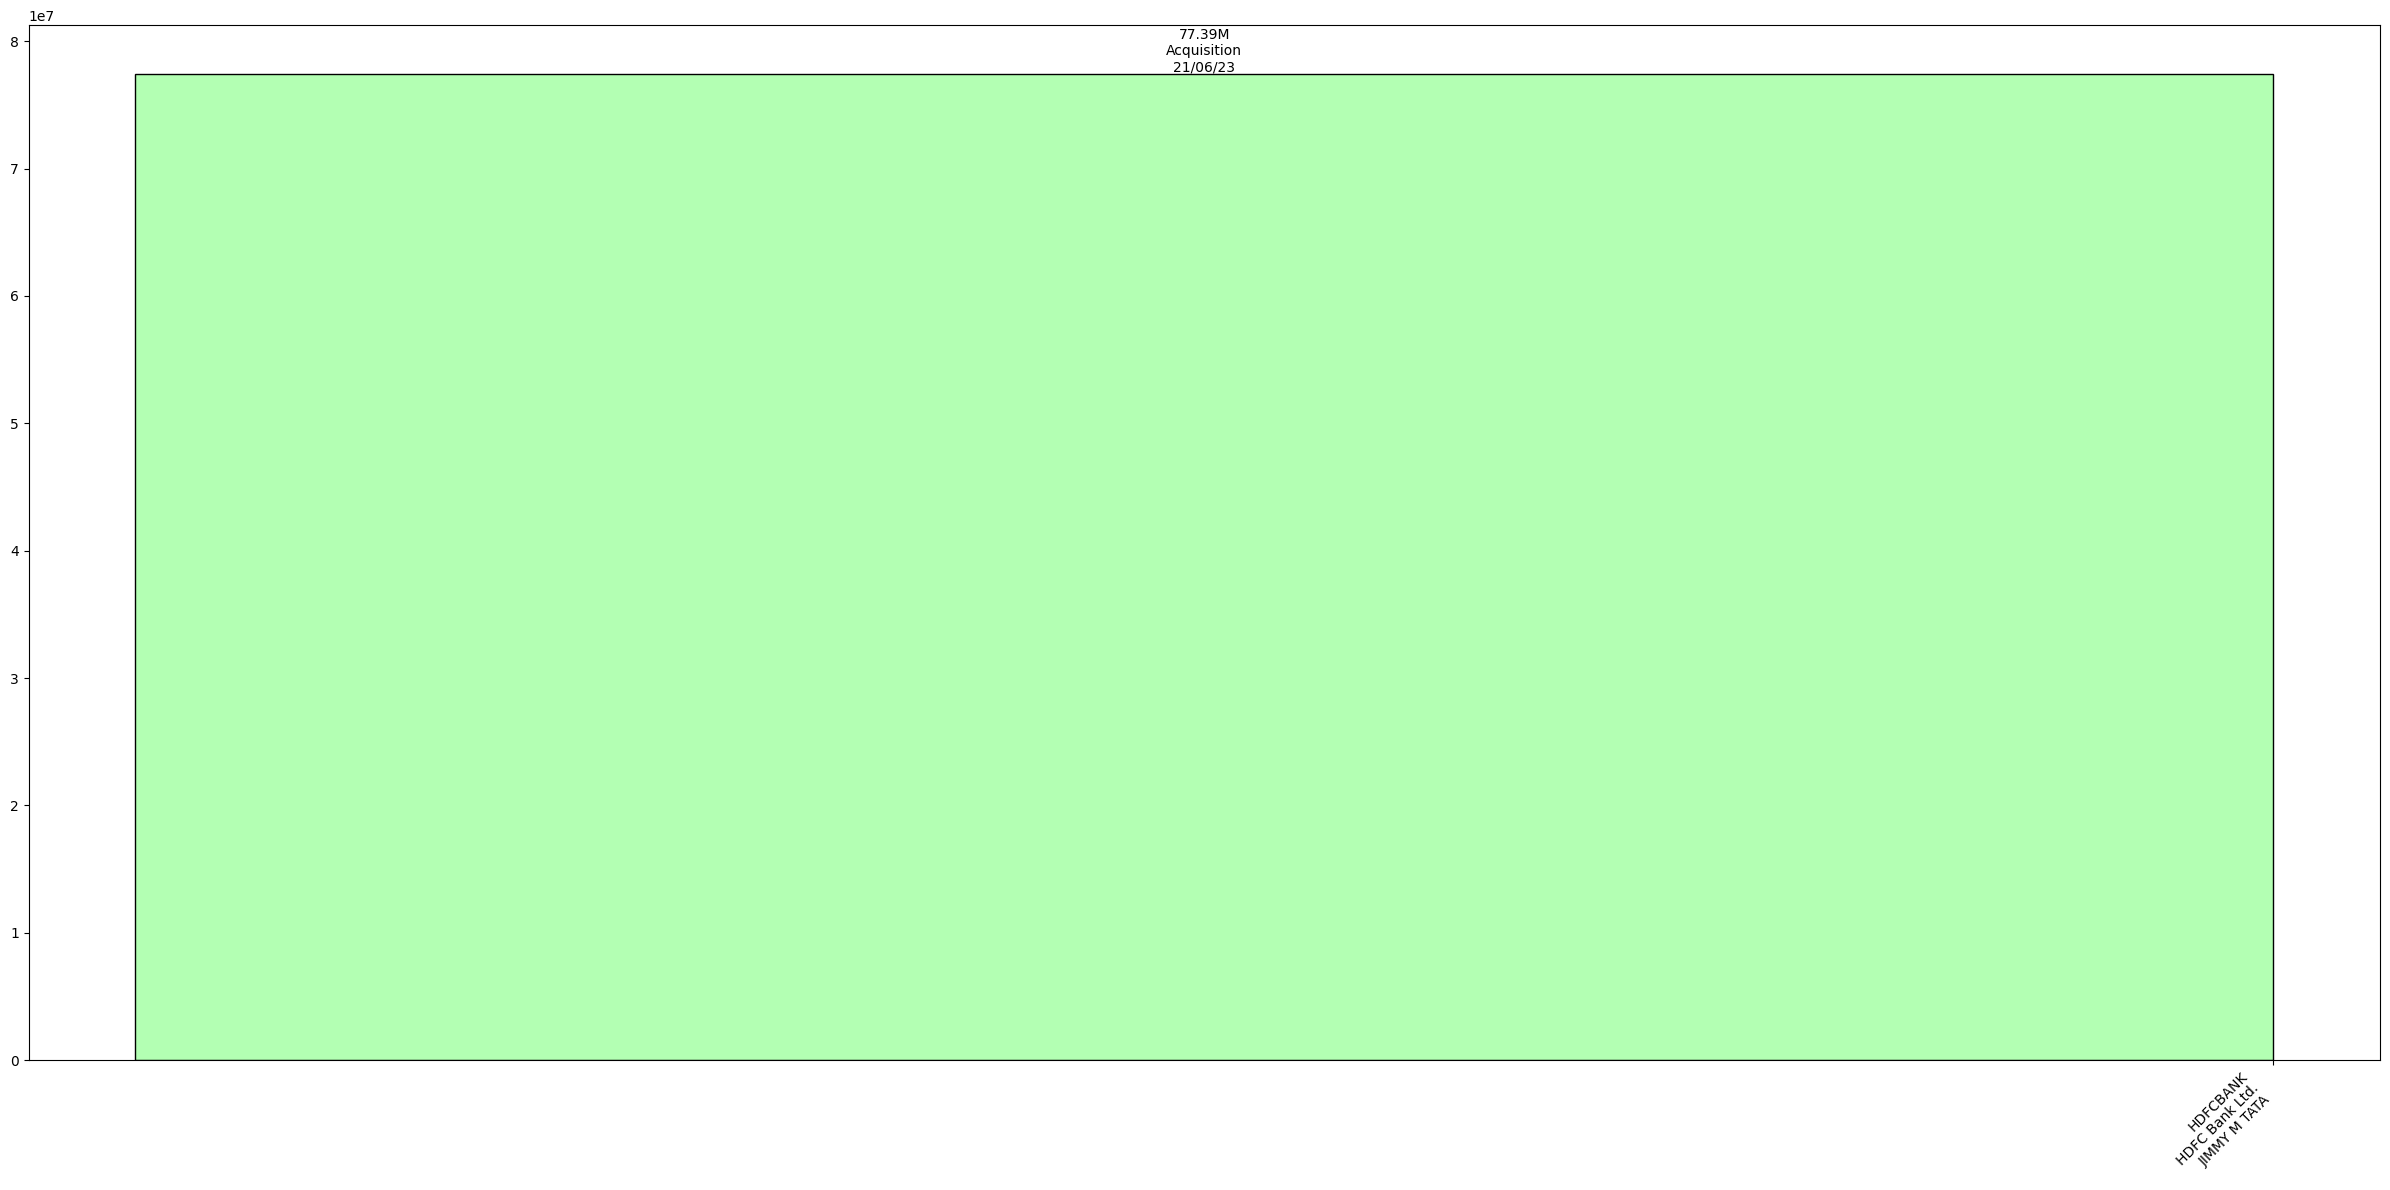


Sheet Name: SAST-Significant Acquisitions


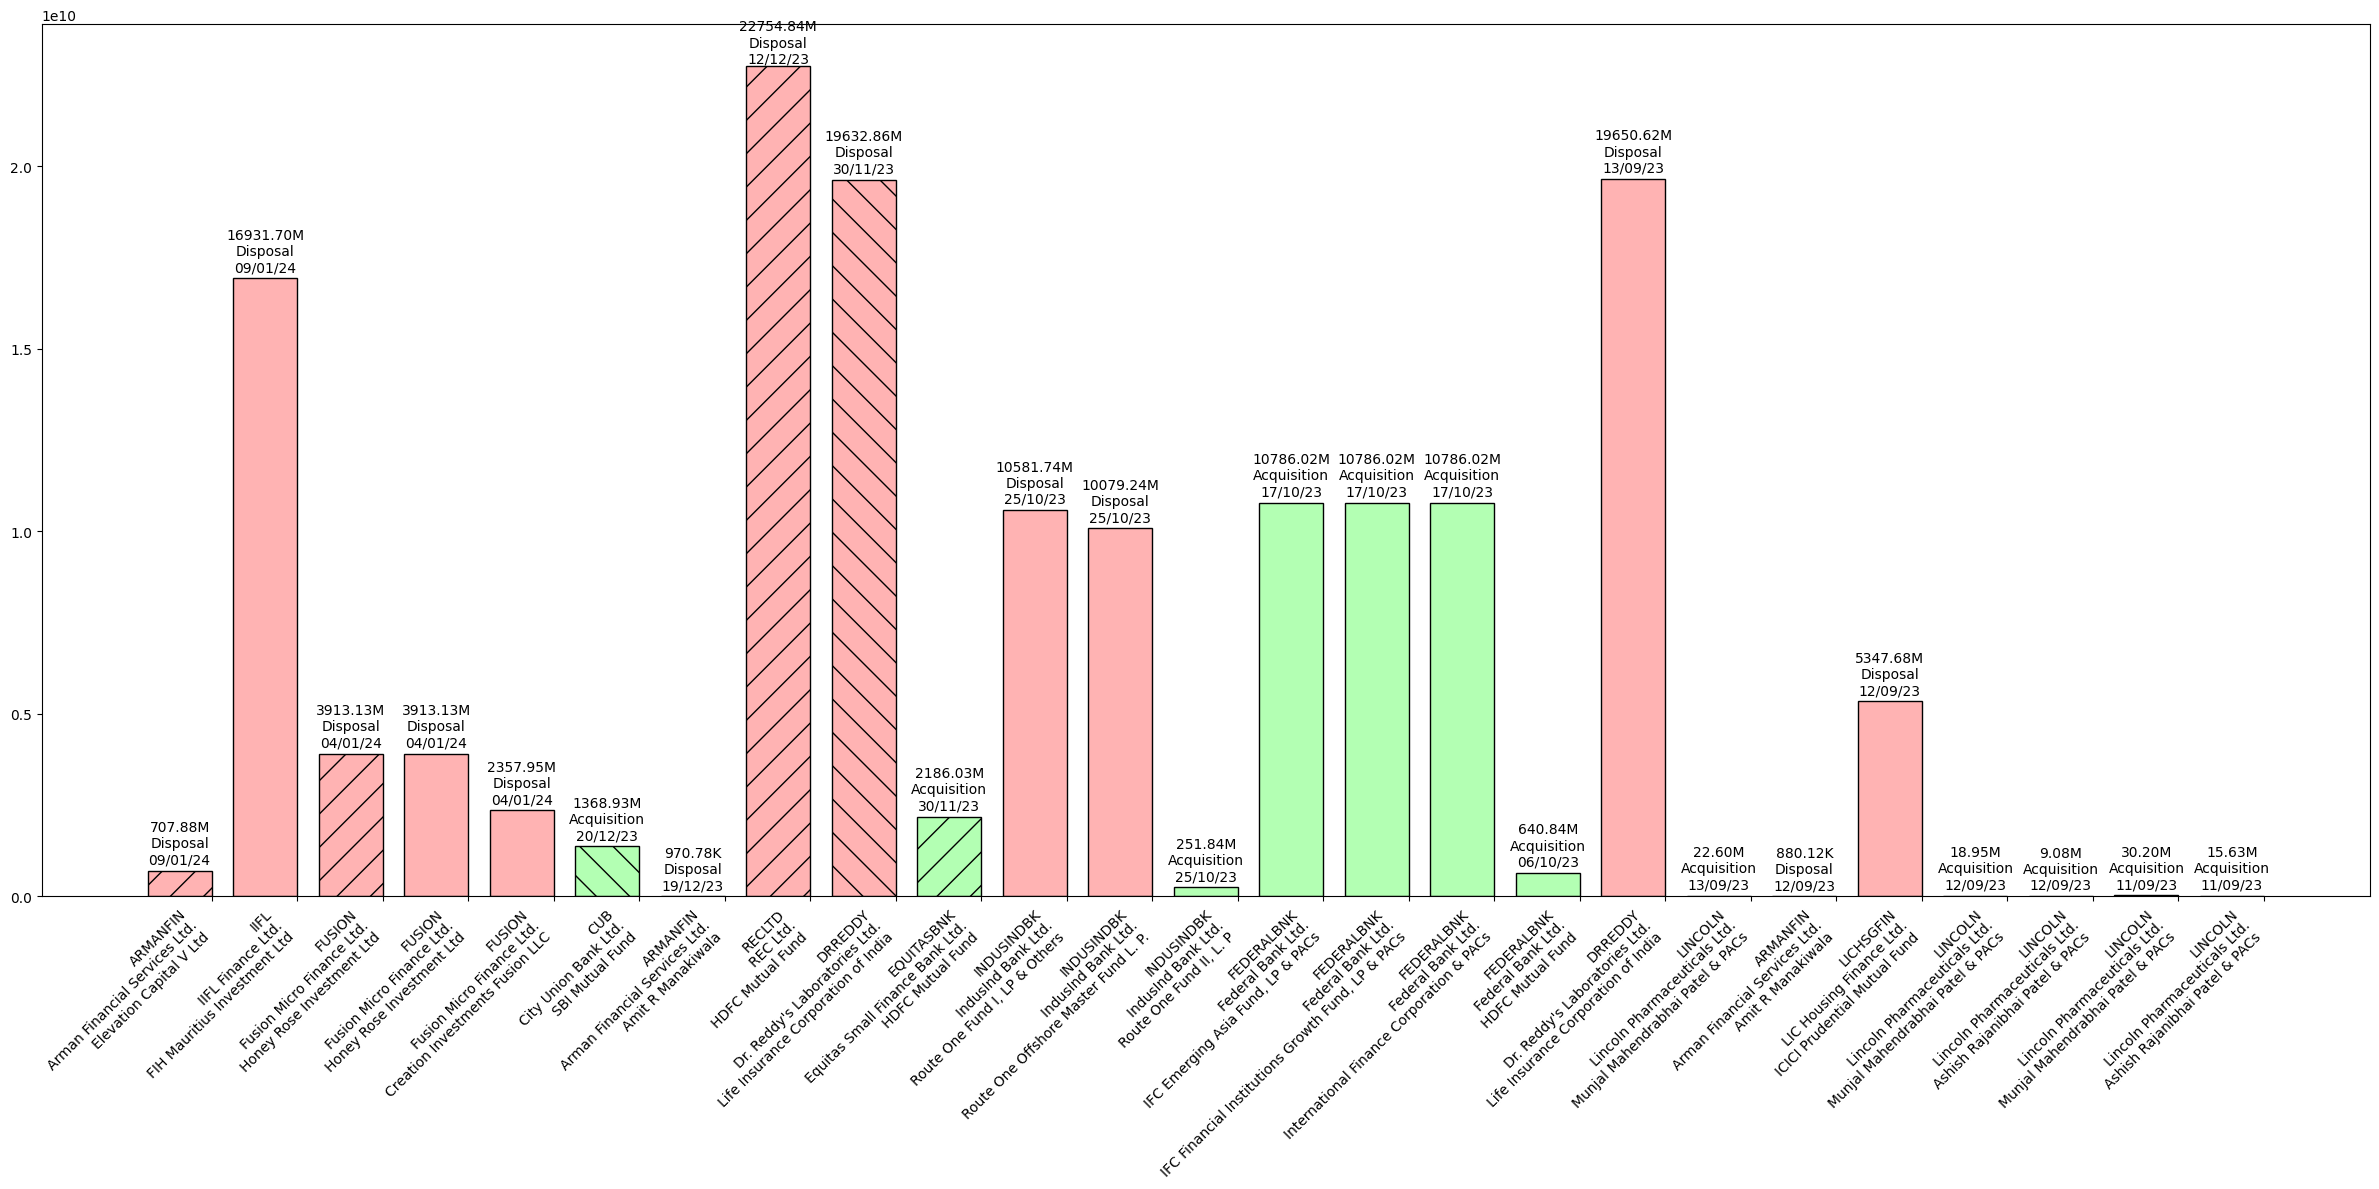

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

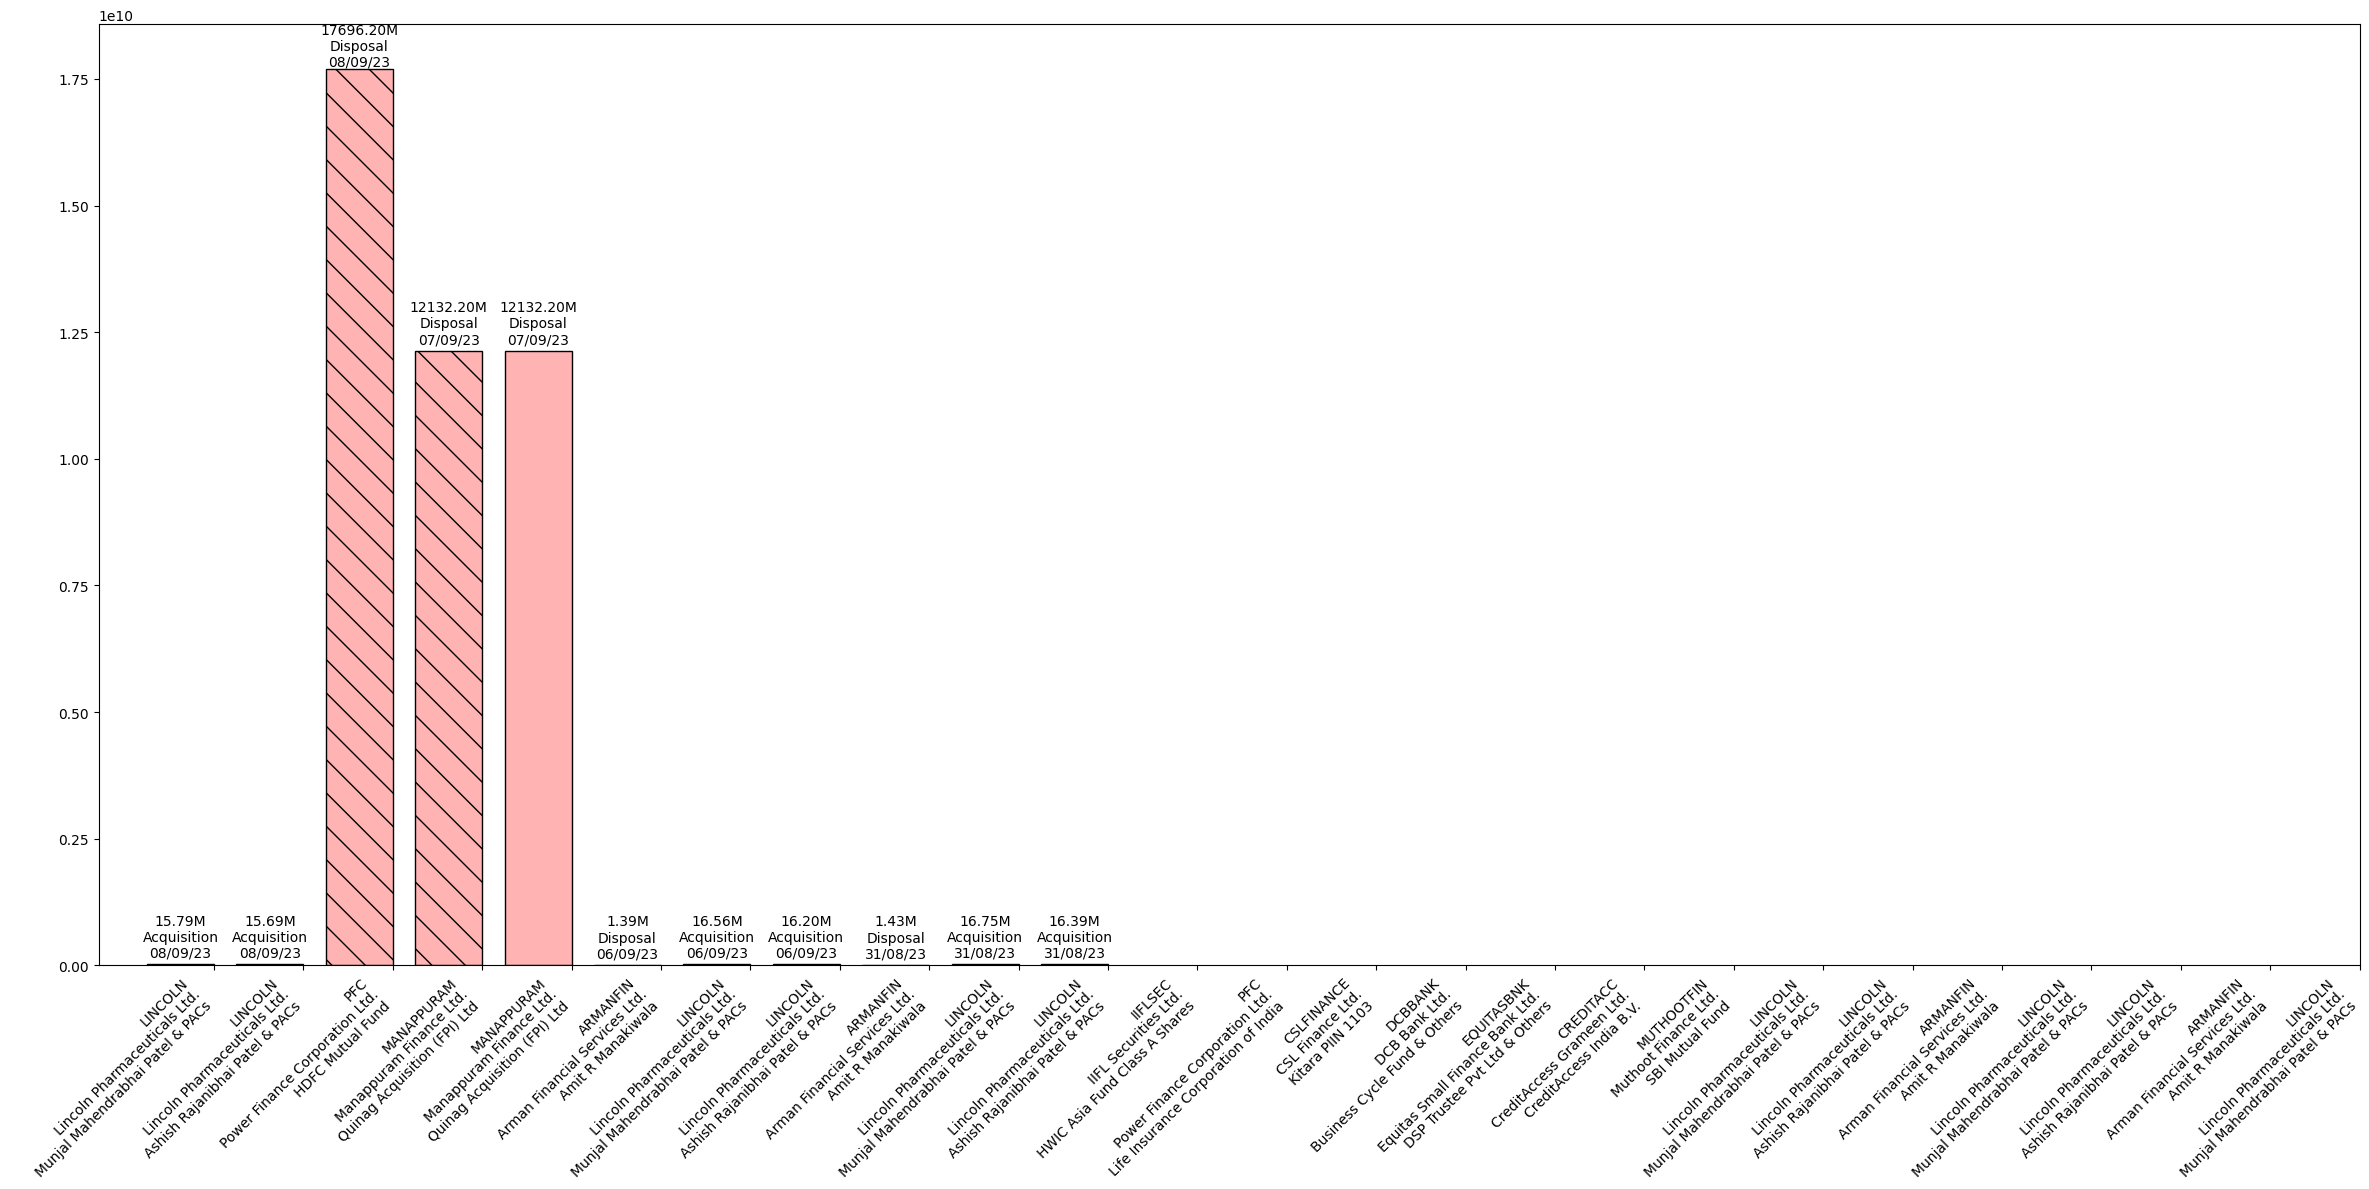

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


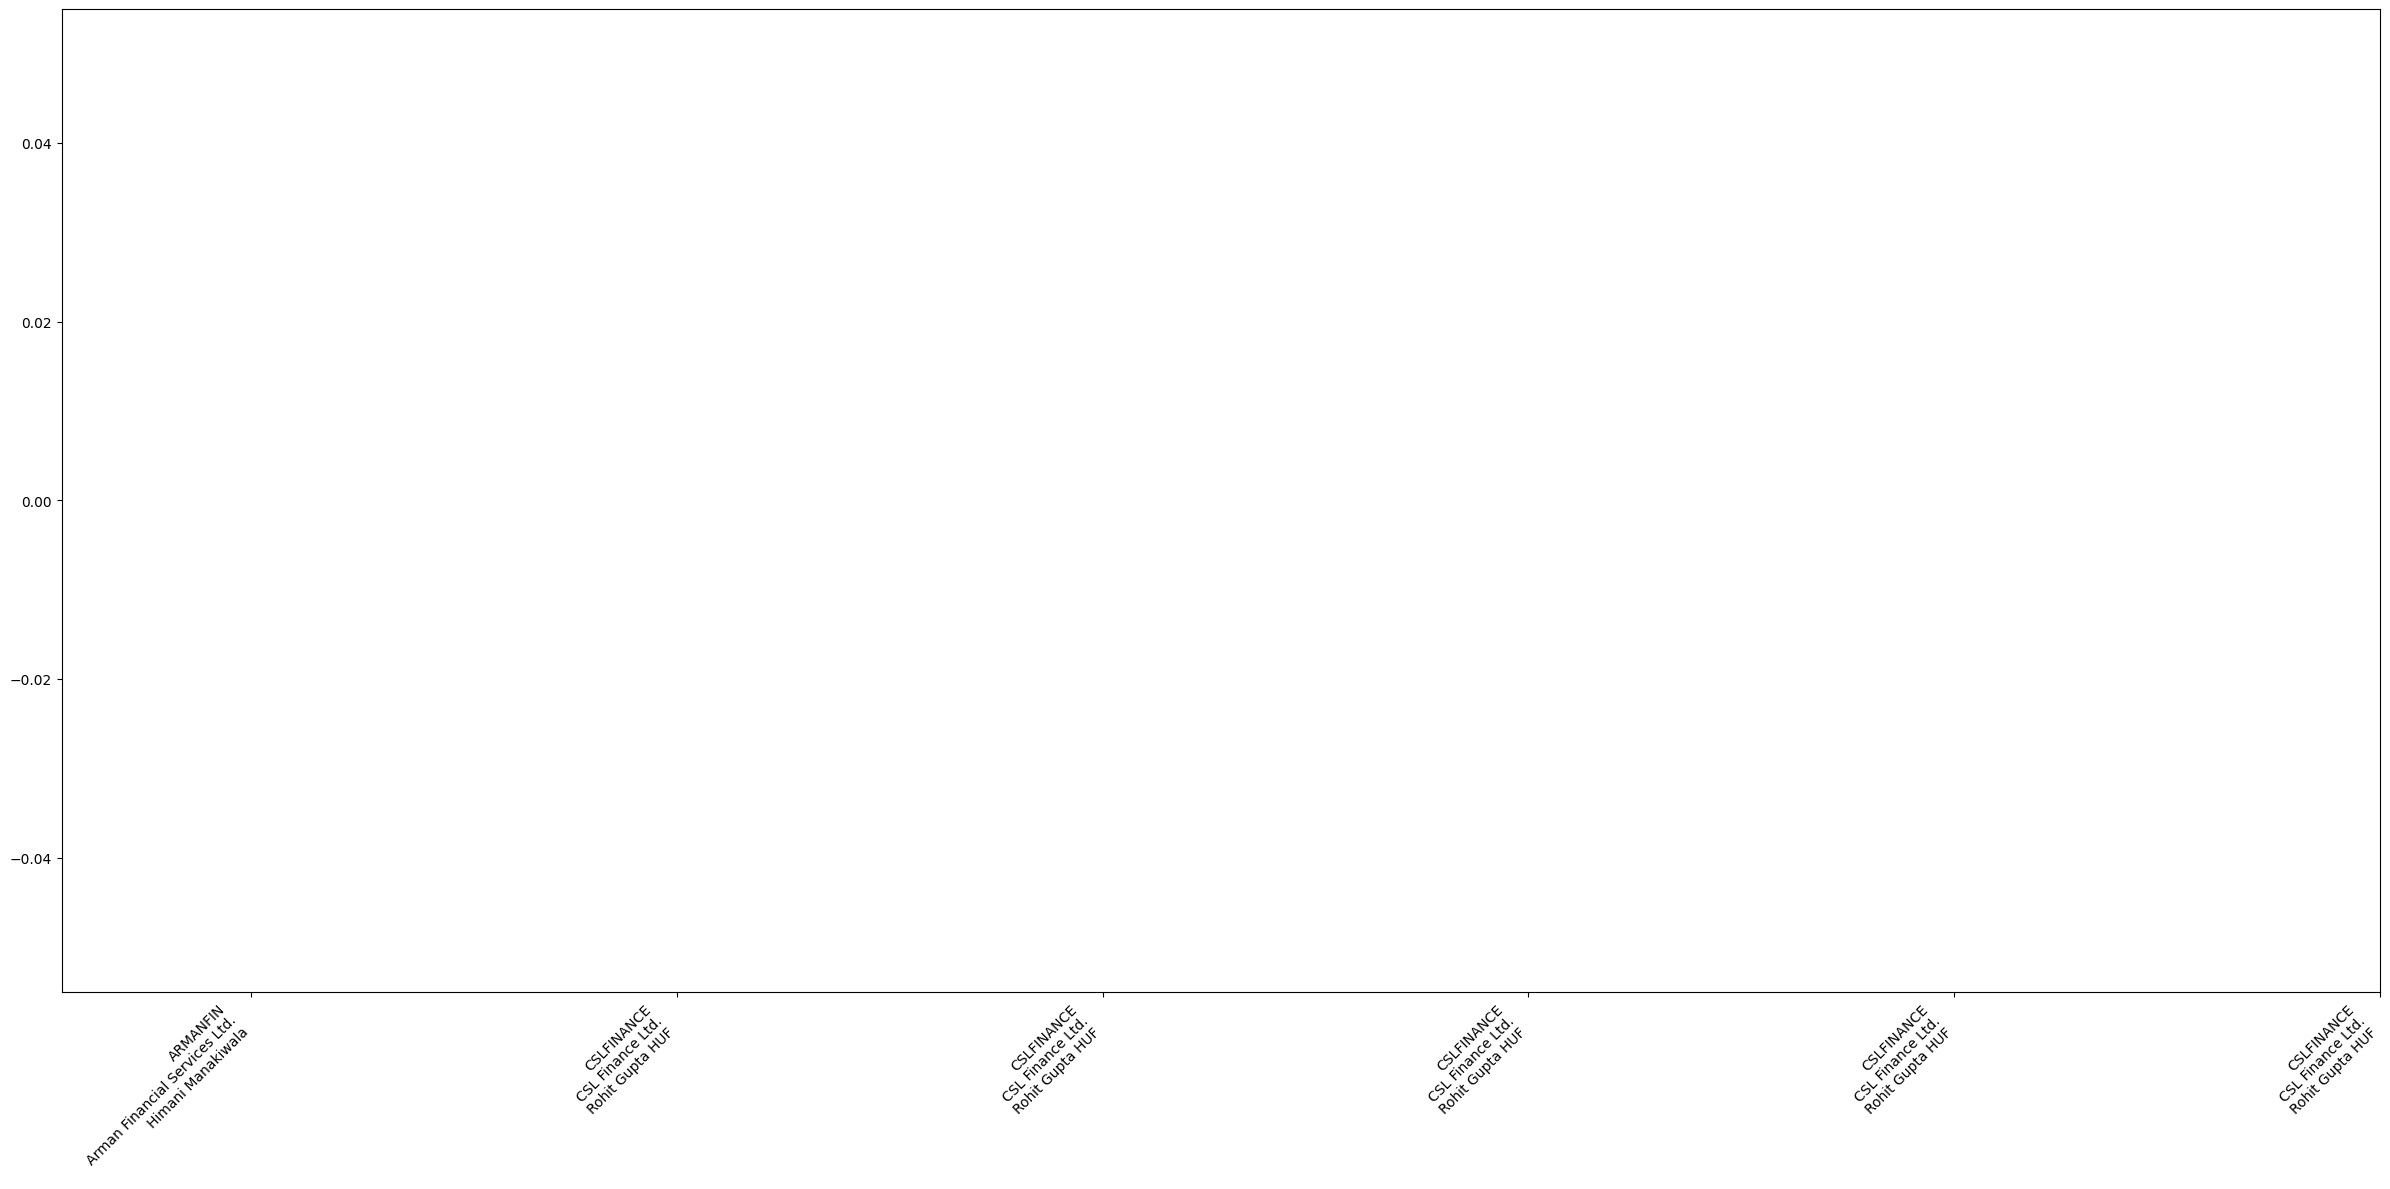

posx and posy should be finite values
posx and posy should be finite values



Special Clients:


posx and posy should be finite values
posx and posy should be finite values


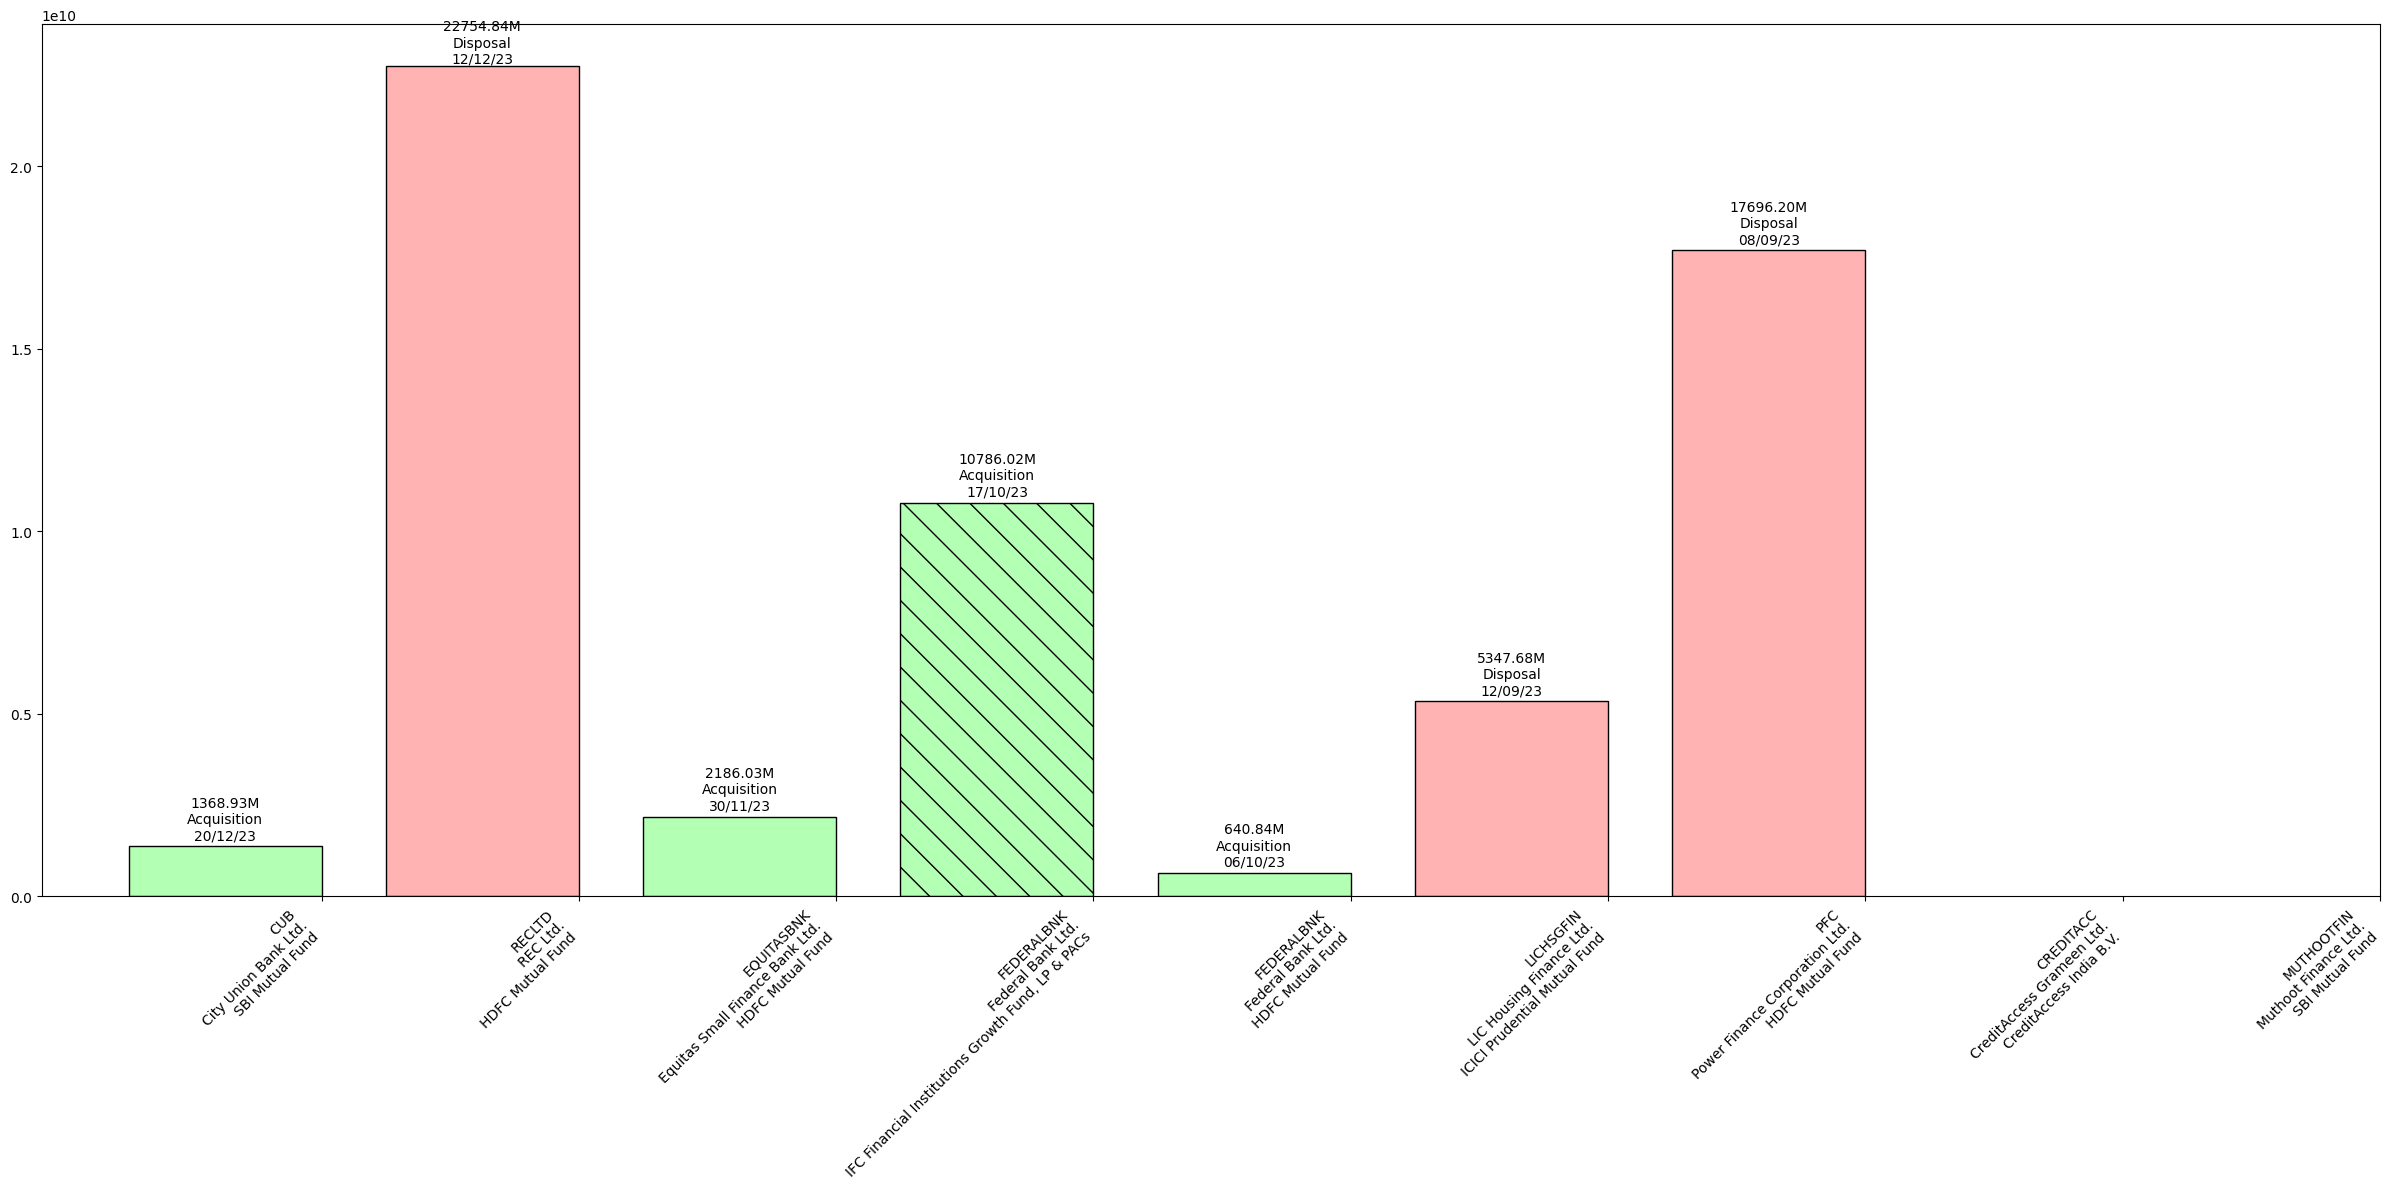

In [43]:
import os
import pandas as pd
from tabulate import tabulate
import smtplib
from email.mime.text import MIMEText
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re


# Path to the Excel file with values to match
values_excel_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\Scrip\Scrip23012024.xlsx'

# Path to the folder with multiple Excel files
inbound_folder_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\Outbound'
outbound_folder_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\Outbound'

# Read values to match from the Excel file
# values_df = pd.read_excel(values_excel_path)

# Extract the values from the relevant column (e.g., 'Scrip Code')
# values_to_match = values_df['Next 1000'].astype(str).str.lower().tolist()
values_to_match = df_filtered['NSE code'].astype(str).str.lower().tolist()

# Get a list of Excel files in the inbound folder
inbound_files = [os.path.join(inbound_folder_path, file) for file in os.listdir(inbound_folder_path) if file.endswith('.xlsx')]

# Your send_email function
def send_email(subject, body):
    # Configure email settings
    sender_email = "healthyplusrich@gmail.com"
    receiver_email = "akirabots@gmail.com"
    password = "password"

    # Create email message
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = sender_email
    msg['To'] = receiver_email

    # Send email
    try:
        # Send email
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(sender_email, password)
            server.sendmail(sender_email, receiver_email, msg.as_string())
            print("Email sent successfully")
    except Exception as e:
        print(f"Error sending email: {e}")

def display_top_transactions_charts(unique_action_row, max_charts=10):
    # Calculate the total number of charts
    rows_per_chart = 25  # You can adjust the value based on your requirements

    total_charts = int(np.ceil(len(unique_action_row) / rows_per_chart))

    # Iterate through the data and display a maximum of three charts for each set of 25 rows
    for chart_num in range(min(total_charts, max_charts)):
        start_index = chart_num * rows_per_chart
        end_index = (chart_num + 1) * rows_per_chart
        subset_data = unique_action_row.iloc[start_index:end_index]

        # Create a bar chart with unique patterns for bars with the same code
        plt.figure(figsize=(24, 12))
        
        # Adjust the width and spacing between bars
        width = 0.6
        spacing = 0.2

        # Define colors based on action
        mild_green = '#b3ffb3'  # Mild green color
        mild_red = '#ffb3b3'    # Mild red color
        mild_orange = '#ffcc99'  # Mild orange color
        mild_yellow = '#ffffb3'  # Mild yellow color

        colors = [
            mild_green if (isinstance(action, str) and action.lower() in ['acquisition', 'purchase']) else
            mild_red if (isinstance(action, str) and action.lower() in ['sell', 'disposal']) else
            mild_orange if (isinstance(action, str) and action.lower() == 'revoke') else
            mild_yellow for action in subset_data['Action']
        ]

        bars = plt.bar(np.arange(len(subset_data)) * (width + spacing), subset_data['Amount'], width=width, color=colors, edgecolor='black')

        # Display the 'Code' and 'Client Name' on the x-axis
        x_labels = [
            f"{code}\n{stock}\n{name}" 
            for code, stock, name,  in zip(subset_data['Code'],subset_data['Stock'], subset_data['Client Name'])
        ]
        
        # Center the labels between bars
        plt.xticks(np.arange(len(subset_data)) * (width + spacing) + width / 2, x_labels, rotation=45, ha='right')

        # Display the formatted amount, action, and file date on top of each bar
        for bar, amount, action, file_date in zip(bars, subset_data['Amount'], subset_data['Action'], subset_data['File Date']):
            formatted_amount = f'{amount / 1_000:.2f}K' if amount < 1_000_000 else f'{amount / 1_000_000:.2f}M'
            formatted_file_date = datetime.strptime(file_date, '%Y%m%d').strftime('%d/%m/%y')
            # Adjust the position calculation to ensure finite values
            position = min(bar.get_height() + 0.005 * max(subset_data['Amount']), max(subset_data['Amount']))

            plt.text(bar.get_x() + bar.get_width() / 2, position,
                     f'{formatted_amount}\n{action}\n{formatted_file_date}', ha='center', va='bottom')

        # Add unique patterns for bars with the same code
        unique_codes = subset_data['Code'].unique()
        for code, bar in zip(unique_codes, bars):
            indices = np.where(subset_data['Code'] == code)[0]
            if len(indices) > 1:
                for i, index in enumerate(indices):
                    bar.set_hatch('/')
                    if i % 2 == 1:
                        bar.set_hatch('\\')

        # Show the chart
        plt.tight_layout()
        plt.show()

def process_data(process_df, price_col='Average Price', quantity_col='Quantity'):
    # Calculate 'Amount' column

    process_df = process_df.copy()
    process_df['Amount'] = process_df[price_col] * process_df[quantity_col]

    # Get unique action rows
    unique_action_rows = process_df.groupby(['File Date', 'Code', 'Client Name']).filter(lambda x: x['Action'].nunique() == 1)
    # print("Only Buy or Sell:")
    # print(tabulate(unique_action_rows, headers='keys', tablefmt='pretty', showindex=False))
    # #Display Chart
    display_top_transactions_charts(unique_action_rows)

# Check if there are no files in the inbound folder
if not inbound_files:
    print("No files present in the inbound folder.")
else:
    # Dictionary to store results for each sheet name
    merged_results = {}

    # Iterate through each file
    for file_path in inbound_files:
        # Extract file date from the filename
        file_date = os.path.basename(file_path)[:8]

        # Read all sheets from the Excel file into a dictionary of DataFrames
        dfs = pd.read_excel(file_path, sheet_name=None)
        # Iterate through each sheet
        # print("values_to_match")
        # print(values_to_match)
        for sheet_name, df in dfs.items():
            # Convert the fourth column to lowercase and filter rows
            filtered_rows = df[df.iloc[:, 3].astype(str).str.lower().isin(map(str.lower, values_to_match))]

            #filtered_rows = df[df.iloc[:, 3].astype(str).str.lower().str.contains('|'.join(map(str.lower, values_to_match)))]
            #filtered_rows = df[df.iloc[:, 3].astype(str).str.lower().str.contains(r'\b(?:' + '|'.join(map(re.escape, map(str.lower, values_to_match))) + r')\b')]
            # print(df.iloc[:, 3].astype(str).str.lower())
            # Drop the specified columns
            filtered_rows = filtered_rows.drop(columns=['Stock URL', 'ISIN', 'Stock Deals Page'])

            # Add a new column for file date
            filtered_rows['File Date'] = file_date

            # Check if the sheet name exists in the merged results dictionary
            if sheet_name not in merged_results:
                merged_results[sheet_name] = filtered_rows
            else:
                # Append the filtered rows to the existing sheet name
                merged_results[sheet_name] = pd.concat([merged_results[sheet_name], filtered_rows])
            


    # Display merged results
    for sheet_name, merged_df in merged_results.items():
        # Display the sheet name
        print(f"\nSheet Name: {sheet_name}")
    
        # Check if there are any rows in the merged result
        if not merged_df.empty:
            # Sort the result based on 'Code' and 'File Date'
            #sorted_rows = merged_df.sort_values(by=['Code', 'File Date'])
            sorted_rows = merged_df.sort_values(by=['File Date', 'Code'], ascending=[False, True])

            # Drop rows with NaN values in the 'code' column
            sorted_rows = sorted_rows.dropna(subset=['Code'])
            
            # # Check if there are any rows left after dropping NaN values
            # if not sorted_rows.empty:
            #     # Print the table if there are rows left
            #     print(tabulate(sorted_rows, headers='keys', tablefmt='pretty', showindex=False))
            # else:
            #     print("All rows have been dropped due to NaN values in 'code' column.")
            
            # Calculate the new column by multiplying "Average Price" and "Quantity" for 'Bulk Block Deals'
            if sheet_name == 'Bulk Block Deals':
                   process_data(sorted_rows, price_col='Average Price', quantity_col='Quantity')
            if sheet_name == 'Insider Disclosures':
                   process_data(sorted_rows, price_col='Avg. Price', quantity_col='Quantity')
            if sheet_name == 'SAST-Significant Acquisitions':
                   process_data(sorted_rows, price_col='Last Traded Price', quantity_col='Quantity')



            # Read the second sheet named 'Client' from Scrip.xlsx
            client_sheet_df = pd.read_excel(values_excel_path, sheet_name='Client', header=None, skiprows=1)
            clients_info = client_sheet_df.iloc[:, :2].rename(columns={0: 'Client Code', 1: 'Client Name'})
            clients_info['Client Code'] = clients_info['Client Code'].astype(str).str.lower()
    
            # Filter rows in sorted_rows where 'Client Name' partially matches 'Client Code' list
            special_clients = sorted_rows[sorted_rows['Client Name'].astype(str).str.lower().str.contains('|'.join(clients_info['Client Code'].tolist()), na=False)]
    
            # Send email with the result
            email_subject = f"Results for {sheet_name}"
            email_body = tabulate(sorted_rows, headers='keys', tablefmt='pretty', showindex=False)
            #send_email(email_subject, email_body)
    
            # # Move the file to the outbound folder after processing all sheets
            # outbound_file_path = os.path.join(outbound_folder_path, os.path.basename(file_path))
            # os.rename(file_path, outbound_file_path)
            # print(f"File moved to: {outbound_file_path}")
            
            # Display special clients in a separate tabular format
            if not special_clients.empty:
                print("\nSpecial Clients:")
                # print(tabulate(special_clients, headers='keys', tablefmt='pretty', showindex=False))

                # Calculate the new column by multiplying "Average Price" and "Quantity" for 'Bulk Block Deals'
                if sheet_name == 'Bulk Block Deals':
                       process_data(special_clients, price_col='Average Price', quantity_col='Quantity')
                if sheet_name == 'Insider Disclosures':
                       process_data(special_clients, price_col='Avg. Price', quantity_col='Quantity')
                if sheet_name == 'SAST-Significant Acquisitions':
                       process_data(special_clients, price_col='Last Traded Price', quantity_col='Quantity')

                
                email_subject = f"Results for Special Client {sheet_name}"
                email_body = tabulate(special_clients, headers='keys', tablefmt='pretty', showindex=False)
                #send_email(email_subject, email_body)
                
            else:
                print("No special clients present.")
        else:
            print("No data present.")

+----+---------------------------+----------------------------------------------------------------------------------------------------------------+-------+------------+------------+--------------+-------------------+
|    |           Scrip           |                                               Paragraph_content                                                | Score | Confidence |    Date    | FinBertScore |     Strength      |
+----+---------------------------+----------------------------------------------------------------------------------------------------------------+-------+------------+------------+--------------+-------------------+
| 21 |        canara bank        | 23 January 2024 (Today) Derivative Segment • Axis Bank Ltd. • Granules India Ltd. • Havells India Ltd. • Indus |  99   |  0.00000   | 2024-01-23 |      0       |    Investment,    |
|    |                           |  Towers Ltd. • L&T Finance Holdings Ltd. • Mahanagar Gas Ltd. • Pidilite Industries Ltd. • REC Lt

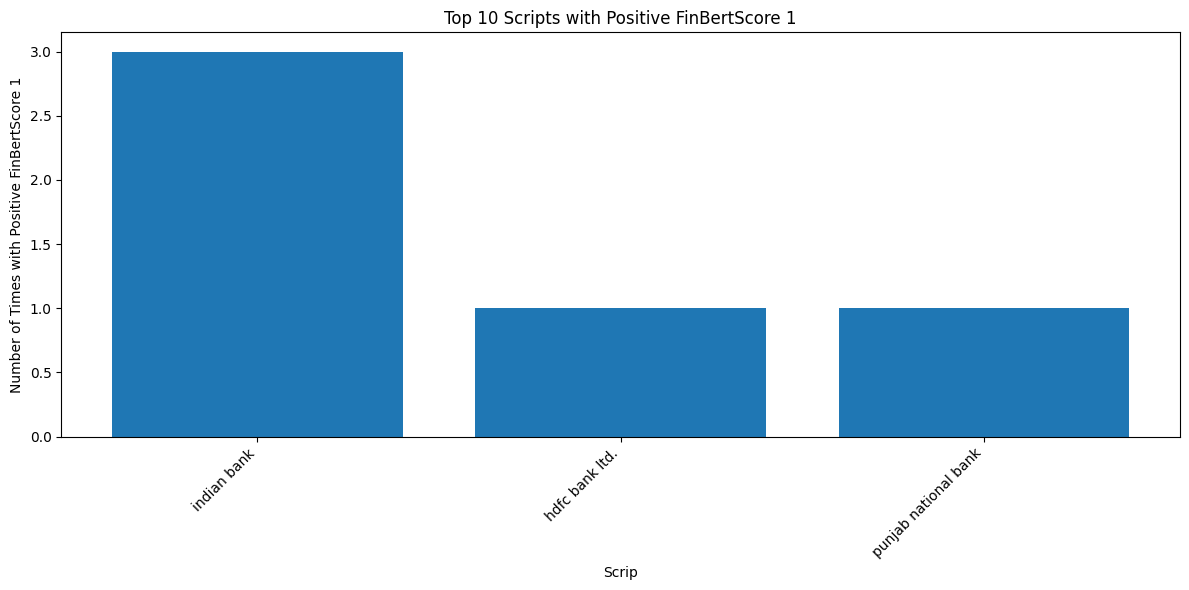

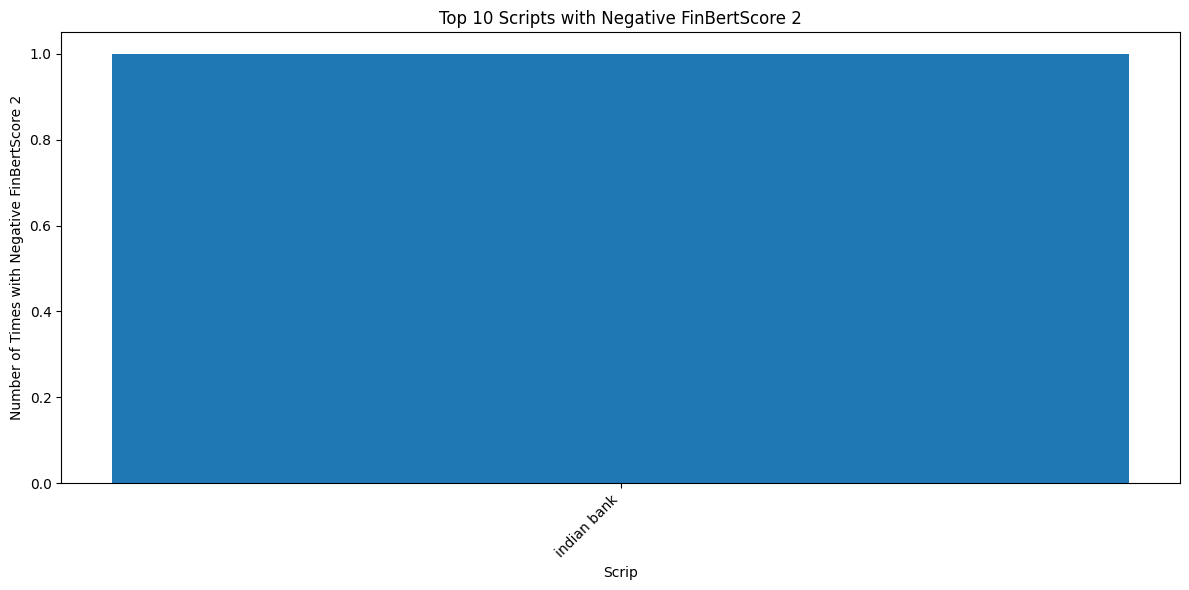

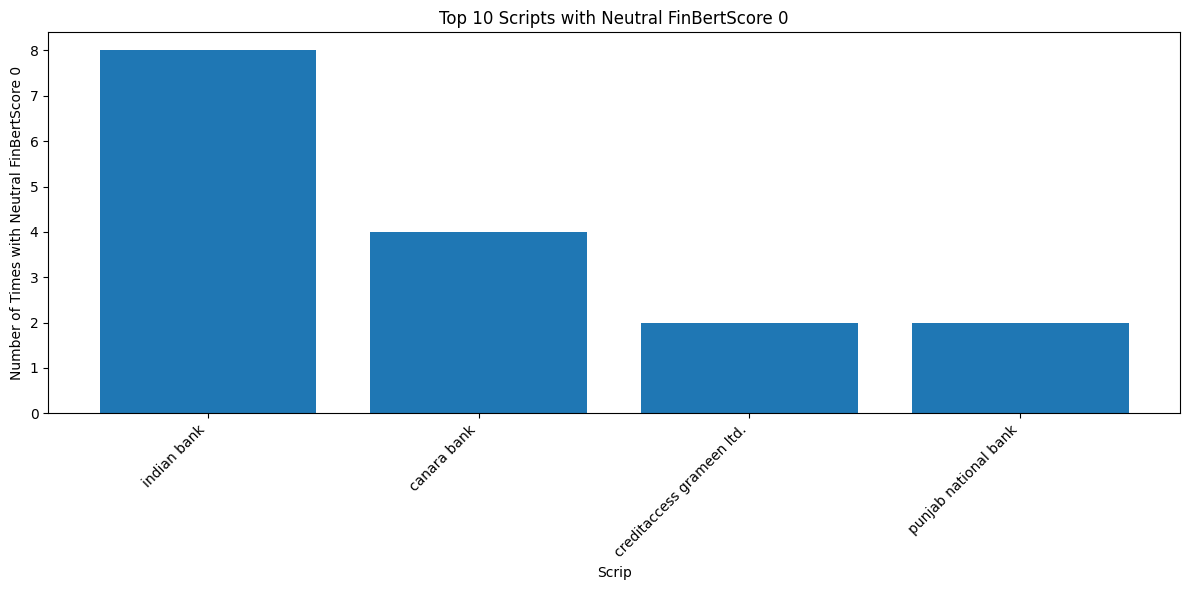

In [44]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import textwrap
from pymongo import MongoClient
from tabulate import tabulate
import matplotlib.pyplot as plt
import re
from datetime import datetime


# MongoDB connection URI (replace with your actual URI)
uri = "mongodb://localhost:27017"

# Specify the database and collection
database_name = "NewsAnalytics"
collection_name = "RawNews_Hindu"

# Path to the Excel file
excel_file_path = r'C:\Users\91908\Documents\Raja\Share market\Analysis\Trendlyne\Data\Scrip\Scrip23012024.xlsx'


try:
    # Create a new client and connect to the MongoDB server
    with MongoClient(uri) as client:
        
        collection = client[database_name][collection_name]
    
        # Query all records in the collection
        # all_records = collection.find()
    
        
        start_date = datetime(2024, 1, 1, 0, 0, 0)
        end_date = datetime(2024, 1, 24, 0, 0, 0)
        
        find_query = {
            "created_at": {
                "$gte": start_date,
                "$lt": end_date
            }
        }
        
            
        all_records = collection.find(find_query)
        mongo_documents = list(all_records)

        if not mongo_documents:
            print("No records found from DB")
        else:
    
            # Read the "Portfolio" sheet from the Excel file
    
            # Assuming the column containing stock names is named "Portfolio"
            stock_names_in_portfolio = df_filtered['Stock Name'].astype(str).str.lower().tolist()
         

            # Create a list to store tuples of (Scrip, paragraph_content, label, confidence, date, strength)
            result_list = []
    
            # Check if each stock name in the portfolio is present in MongoDB documents
            for document in mongo_documents:
                for stock_name in stock_names_in_portfolio:
                    if stock_name.lower() in document['paragraph_content'].lower():
                        # Wrap paragraph content to a maximum of five words per line
                        wrapped_content = '\n'.join(textwrap.wrap(document['paragraph_content'], width=110))
                        # Extract the numeric part from the 'Score' column
                        numeric_score = int(''.join(filter(str.isdigit, document['sentiment']['label'])))
                        
                        result_list.append((
                            stock_name,
                            wrapped_content,
                            numeric_score,  # Use the extracted numeric score
                            document['sentiment']['confidence'],
                            document['created_at'].strftime('%Y-%m-%d'),  # Extract date from created_at
                            document['FinBertScore'],
                            None  # Placeholder for Strength column
                        ))
                        break  # Break if at least one match is found for the current document
    
            # Create a DataFrame from the result list
            result_df = pd.DataFrame(result_list, columns=['Scrip', 'Paragraph_content', 'Score', 'Confidence', 'Date', 'FinBertScore', 'Strength'])
    
            # Check if Positive/Negative sheet is present in the Excel file
            xls = pd.ExcelFile(excel_file_path, engine='openpyxl')  # Use openpyxl engine
            if 'PositiveNegative' in xls.sheet_names:
                # Read the Positive/Negative sheet from the Excel file
                positive_negative_df = pd.read_excel(xls, sheet_name='PositiveNegative', header=0)
    
                # Assuming the column containing positive/negative words is named "PositiveNegative"
                positive_negative_words = positive_negative_df['PositiveNegative'].tolist()
    
                # Update the Strength column based on positive/negative words
                result_df['Strength'] = result_df.apply(
                    lambda row: ', '.join(
                        positive_negative_word
                        for positive_negative_word in positive_negative_words
                        if positive_negative_word.lower() in row['Paragraph_content'].lower()
                    ),
                    axis=1
                )
                
                # Wrap the entire 'Strength' column to a maximum width of 140 characters
            result_df['Strength'] = result_df['Strength'].apply(lambda x: '\n'.join(textwrap.wrap(str(x), width=17)))
    
            # Sort the DataFrame based on multiple columns in ascending order
            result_df['Confidence'] = result_df['Confidence'].apply(lambda x: f"{x:.5f}")
            result_df = result_df.sort_values(by=['Date', 'Scrip', 'Score', 'Confidence'], ascending=[False, True, False, False])
    
            # Display the DataFrame
            print(tabulate(result_df, headers='keys', tablefmt='pretty'))
    
    
    
            # Assuming 'result_df' is your DataFrame
            
            # Convert 'Scrip' to lowercase and trim spaces
            result_df['Scrip'] = result_df['Scrip'].str.lower().str.strip()
            
            # Calculate the counts of positive FinBertScores for each 'Scrip'
            positive_counts_1 = result_df[result_df['FinBertScore'] == 1].groupby('Scrip').size()
            
            # Select the top 10 results for FinBertScore 1
            top_10_results_1 = positive_counts_1.nlargest(50)
            
            # Set a larger figure size
            plt.figure(figsize=(12, 6))
            
            # Plot the results for FinBertScore 1
            plt.bar(top_10_results_1.index, top_10_results_1)
            plt.xlabel('Scrip')
            plt.ylabel('Number of Times with Positive FinBertScore 1')
            plt.title('Top 10 Scripts with Positive FinBertScore 1')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    
            
            # Calculate the counts of positive FinBertScores for each 'Scrip'
            positive_counts_2 = result_df[result_df['FinBertScore'] == 2].groupby('Scrip').size()
            
            # Select the top 10 results for FinBertScore 1
            top_10_results_2 = positive_counts_2.nlargest(50)
           
            # Set a larger figure size
            plt.figure(figsize=(12, 6))
            
            # Plot the results for FinBertScore 1
            plt.bar(top_10_results_2.index, top_10_results_2)
            plt.xlabel('Scrip')
            plt.ylabel('Number of Times with Negative FinBertScore 2')
            plt.title('Top 10 Scripts with Negative FinBertScore 2')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()


            # Calculate the counts of positive FinBertScores for each 'Scrip'
            positive_counts_2 = result_df[result_df['FinBertScore'] == 0].groupby('Scrip').size()
            
            # Select the top 10 results for FinBertScore 1
            top_10_results_2 = positive_counts_2.nlargest(50)
           
            # Set a larger figure size
            plt.figure(figsize=(12, 6))
            
            # Plot the results for FinBertScore 1
            plt.bar(top_10_results_2.index, top_10_results_2)
            plt.xlabel('Scrip')
            plt.ylabel('Number of Times with Neutral FinBertScore 0')
            plt.title('Top 10 Scripts with Neutral FinBertScore 0')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    

except Exception as e:
    print(e)